<a href="https://colab.research.google.com/github/cvs2010/DeepLearningProjects/blob/main/Projeto_6_cleanning_data_prices_zapimoveis_df.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Etapa 1: Importando bibliotecas

In [1]:
# Importando as bibliotecas
import os
import gdown
import bs4
from bs4 import BeautifulSoup
import urllib.request as urllib_request
from urllib.request import Request, urlopen, urlretrieve
from urllib.request import Request, urlopen
from urllib.error import URLError, HTTPError
import urllib.parse
import pandas as pd
import re
import requests
import math
from numpy.lib.function_base import quantile
%tensorflow_version 2.x
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut

print("Tensorflow ->", tf.__version__)
print("BeautifulSoup ->", bs4.__version__)
print("urllib ->", urllib_request.__version__)
print("pandas ->", pd.__version__)

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
Tensorflow -> 2.12.0
BeautifulSoup -> 4.11.2
urllib -> 3.10
pandas -> 1.5.3


# Etapa 2: Importação da base de dados

In [2]:
# Download do arquivo da base de dados

!wget https://github.com/cvs2010/DeepLearningProjects/raw/main/files/dataset-imovel-df.csv

--2023-07-02 20:37:14--  https://github.com/cvs2010/DeepLearningProjects/raw/main/files/dataset-imovel-df.csv
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/cvs2010/DeepLearningProjects/main/files/dataset-imovel-df.csv [following]
--2023-07-02 20:37:15--  https://raw.githubusercontent.com/cvs2010/DeepLearningProjects/main/files/dataset-imovel-df.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5179167 (4.9M) [text/plain]
Saving to: ‘dataset-imovel-df.csv’

dataset-imovel-df.c 100%[===================>]   4.94M  --.-KB/s    in 0.02s   

2023-07-02 20:37:15 (259 MB/s) - ‘dataset-imovel-df.csv’

In [3]:
# Leitura do arquivo do dataframe , não esqueça do separador de vírgula
house_df = pd.read_csv('/content/dataset-imovel-df.csv', sep=';', encoding='latin')

In [4]:
house_df

,valor,descricao,local,bairro/cidade,quartos,garagem,banheiro,area(m2),iptu,condominio,novidade,suite,academia,varanda,transporte,salao,planejado
0,1150000,Prédio com 450m² para investidores! Com renda ...,Riacho Fundo I,Brasília,1,0,4,450,0,0,Super destaque,0,0,0,0,0,0
1,3650000,Top Line Prime Imóveis exclusivos para cliente...,Avenida Parque Águas Claras,Norte,4,4,6,285,0,2400,Super destaque,1,0,1,0,0,0
2,160000,"LOTE COM UMA PEQUENA COZINHA SIMPLES, GRADE E ...",Quadra 303 Conjunto 6,Recanto das Emas,1,4,1,150,0,0,Super destaque,0,0,0,0,0,0
3,870000,COELHO IMÓVEIS CONSULTORIA PRIME VENDE: Belis...,CA 5,Lago Norte,3,1,2,112,1435,959,Nenhuma,0,0,0,0,0,0
4,550000,Onde nos encontrar? Instagram: @oalmeidaimovei...,Ceilandia Norte,Brasília,3,4,1,250,0,0,Nenhuma,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,380000,Vendo ótima casa em caldas novas de GO!! Casa ...,SQS 216 Bloco J,Asa Sul,3,4,2,410,0,0,Nenhuma,1,0,0,1,0,1
19996,490000,A casa no bairro Residencial Santos Dumont pos...,QRI 27,Residencial Santos Dumont,3,0,2,150,0,0,Nenhuma,1,0,1,1,0,0
19997,320000,Onde nos encontrar? Instagram: @oalmeidaimovei...,Ceilandia Norte,Brasília,3,1,2,70,0,330,Nenhuma,0,0,0,0,0,0
19998,250000,CNB 13 Apartamento2 Quartos Vaga Nascente À ...,CNB 13,Taguatinga Norte,2,1,1,65,0,420,Nenhuma,0,0,0,0,0,0


In [5]:
house_df.head()

,valor,descricao,local,bairro/cidade,quartos,garagem,banheiro,area(m2),iptu,condominio,novidade,suite,academia,varanda,transporte,salao,planejado
0,1150000,Prédio com 450m² para investidores! Com renda ...,Riacho Fundo I,Brasília,1,0,4,450,0,0,Super destaque,0,0,0,0,0,0
1,3650000,Top Line Prime Imóveis exclusivos para cliente...,Avenida Parque Águas Claras,Norte,4,4,6,285,0,2400,Super destaque,1,0,1,0,0,0
2,160000,"LOTE COM UMA PEQUENA COZINHA SIMPLES, GRADE E ...",Quadra 303 Conjunto 6,Recanto das Emas,1,4,1,150,0,0,Super destaque,0,0,0,0,0,0
3,870000,COELHO IMÓVEIS CONSULTORIA PRIME VENDE: Belis...,CA 5,Lago Norte,3,1,2,112,1435,959,Nenhuma,0,0,0,0,0,0
4,550000,Onde nos encontrar? Instagram: @oalmeidaimovei...,Ceilandia Norte,Brasília,3,4,1,250,0,0,Nenhuma,0,0,0,0,0,0


In [6]:
house_df.tail()

,valor,descricao,local,bairro/cidade,quartos,garagem,banheiro,area(m2),iptu,condominio,novidade,suite,academia,varanda,transporte,salao,planejado
19995,380000,Vendo ótima casa em caldas novas de GO!! Casa ...,SQS 216 Bloco J,Asa Sul,3,4,2,410,0,0,Nenhuma,1,0,0,1,0,1
19996,490000,A casa no bairro Residencial Santos Dumont pos...,QRI 27,Residencial Santos Dumont,3,0,2,150,0,0,Nenhuma,1,0,1,1,0,0
19997,320000,Onde nos encontrar? Instagram: @oalmeidaimovei...,Ceilandia Norte,Brasília,3,1,2,70,0,330,Nenhuma,0,0,0,0,0,0
19998,250000,CNB 13 Apartamento2 Quartos Vaga Nascente À ...,CNB 13,Taguatinga Norte,2,1,1,65,0,420,Nenhuma,0,0,0,0,0,0
19999,415000,Casa composta por:03 quartos 01 suíte Sala e c...,ES 5A,Setor de Mansões de Sobradinho,3,2,2,180,0,0,Nenhuma,1,0,0,0,0,0


In [7]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   valor          20000 non-null  int64 
 1   descricao      20000 non-null  object
 2   local          19976 non-null  object
 3   bairro/cidade  20000 non-null  object
 4   quartos        20000 non-null  int64 
 5   garagem        20000 non-null  int64 
 6   banheiro       20000 non-null  int64 
 7   area(m2)       20000 non-null  int64 
 8   iptu           20000 non-null  int64 
 9   condominio     20000 non-null  int64 
 10  novidade       20000 non-null  object
 11  suite          20000 non-null  int64 
 12  academia       20000 non-null  int64 
 13  varanda        20000 non-null  int64 
 14  transporte     20000 non-null  int64 
 15  salao          20000 non-null  int64 
 16  planejado      20000 non-null  int64 
dtypes: int64(13), object(4)
memory usage: 2.6+ MB


In [8]:
house_df.describe()

,valor,quartos,garagem,banheiro,area(m2),iptu,condominio,suite,academia,varanda,transporte,salao,planejado
count,2.000000e+04,20000.000000,20000.000000,20000.000000,2.000000e+04,2.000000e+04,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,7.937859e+05,2.542300,1.891900,2.085300,9.272663e+03,5.348645e+02,180.196650,0.256000,0.013300,0.046700,0.167450,0.022100,0.041000
std,4.129701e+06,1.599512,4.780979,1.655826,9.011775e+04,1.928894e+04,3950.134455,0.436433,0.114559,0.211001,0.373386,0.147012,0.198295
min,0.000000e+00,1.000000,0.000000,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.200000e+05,1.000000,0.000000,1.000000,7.900000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.800000e+05,2.000000,1.000000,1.000000,1.585000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.500010e+05,3.000000,3.000000,3.000000,4.000000e+02,0.000000e+00,160.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2.000000e+08,20.000000,300.000000,40.000000,2.980000e+06,1.111111e+06,394000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
house_df = house_df.rename(columns={'area(m2)': 'area'})
house_df = house_df.rename(columns={'bairro/cidade': 'bairro_cidade'})

In [10]:
house_df.describe()

,valor,quartos,garagem,banheiro,area,iptu,condominio,suite,academia,varanda,transporte,salao,planejado
count,2.000000e+04,20000.000000,20000.000000,20000.000000,2.000000e+04,2.000000e+04,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,7.937859e+05,2.542300,1.891900,2.085300,9.272663e+03,5.348645e+02,180.196650,0.256000,0.013300,0.046700,0.167450,0.022100,0.041000
std,4.129701e+06,1.599512,4.780979,1.655826,9.011775e+04,1.928894e+04,3950.134455,0.436433,0.114559,0.211001,0.373386,0.147012,0.198295
min,0.000000e+00,1.000000,0.000000,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.200000e+05,1.000000,0.000000,1.000000,7.900000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.800000e+05,2.000000,1.000000,1.000000,1.585000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.500010e+05,3.000000,3.000000,3.000000,4.000000e+02,0.000000e+00,160.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2.000000e+08,20.000000,300.000000,40.000000,2.980000e+06,1.111111e+06,394000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Etapa 3: Visualização dos dados

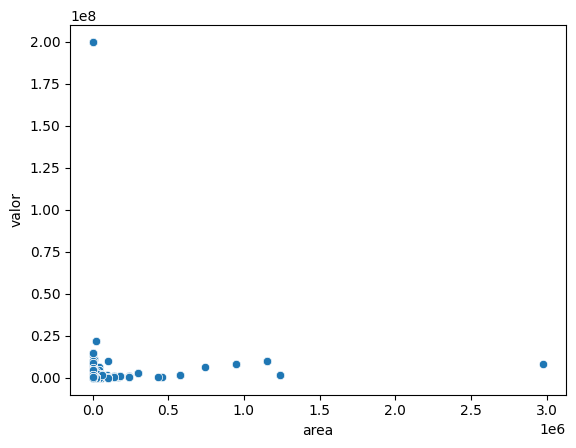

In [11]:
sns.scatterplot(x = 'area', y = 'valor', data = house_df);

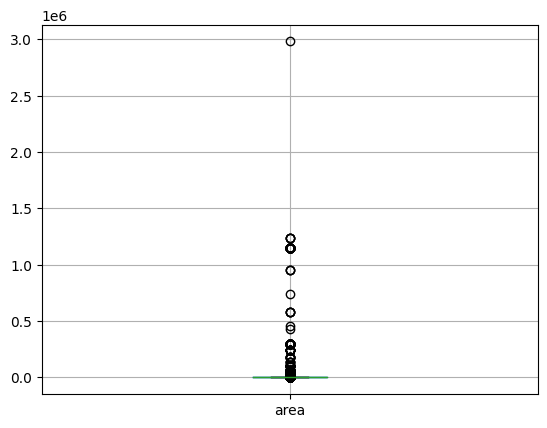

In [12]:
house_df.boxplot(column='area');

Mais abaixo você pode entender que essa não é a melhor forma de eliminar os outliers. O ideal é fazer a eliminação de outliers dentro de cada classe. Aqui podemos ter somente uma ideia geral do que seriam os outliers de uma forma geral no dataframe como um todo, o que não pode ser de grande valia futuramente.

Dessa forma, achamos os outliers acima de 1,5 milhões m²e abaixo de 10 m² aproximadamente. Vamos filtrar os imóveis nessa faixa de preço:

In [13]:
qtd_imoveis_area_alta = len(house_df[house_df.area > 1_000_000])
qtd_imoveis_area_baixa = len(house_df[house_df.area < 10])
print(f"Quantidade total do dataframe é : {len(house_df.area)}.")
print(f"A quantidade de imóveis com area acima de 1 milhão é: {qtd_imoveis_area_alta}.")
print(f"A quantidade de imóveis com area abaixo de 100 mil é: {qtd_imoveis_area_baixa}.")

Quantidade total do dataframe é : 20000.
A quantidade de imóveis com preço acima de 1 milhão é: 106.
A quantidade de imóveis com preço abaixo de 100 mil é: 149.


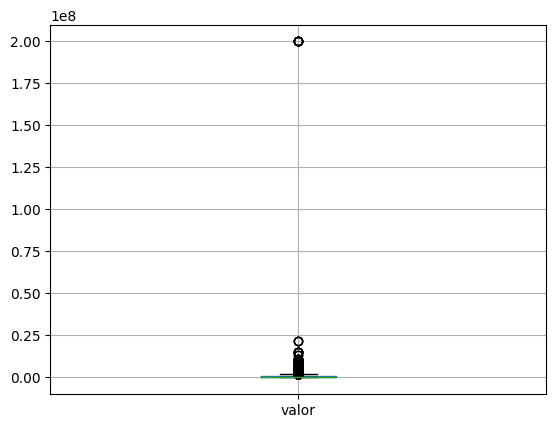

In [14]:
house_df.boxplot(column='valor');

In [15]:
qtd_imoveis_valor_alta = len(house_df[house_df.valor > 3_000_000])
qtd_imoveis_valor_baixa = len(house_df[house_df.valor < 10000])
print(f"Quantidade total do dataframe é : {len(house_df.valor)}.")
print(f"A quantidade de imóveis com preço acima de 3 milhões é: {qtd_imoveis_valor_alta}.")
print(f"A quantidade de imóveis com preço abaixo de 10 mil é: {qtd_imoveis_valor_baixa}.")

Quantidade total do dataframe é : 20000.
A quantidade de imóveis com preço acima de 3 milhões é: 396.
A quantidade de imóveis com preço abaixo de 10 mil é: 1015.


# Etapa 4: Transformação dos dados

In [16]:
filtro_valor_area = (house_df['valor'] > 9999) & (house_df['area'] > 10) & (house_df['area'] < 1_000_001) & (house_df['valor'] < 3_000_001)
df_filtrado_valor_area = house_df.loc[filtro_valor_area]
df_filtrado_valor_area

,valor,descricao,local,bairro_cidade,quartos,garagem,banheiro,area,iptu,condominio,novidade,suite,academia,varanda,transporte,salao,planejado
0,1150000,Prédio com 450m² para investidores! Com renda ...,Riacho Fundo I,Brasília,1,0,4,450,0,0,Super destaque,0,0,0,0,0,0
2,160000,"LOTE COM UMA PEQUENA COZINHA SIMPLES, GRADE E ...",Quadra 303 Conjunto 6,Recanto das Emas,1,4,1,150,0,0,Super destaque,0,0,0,0,0,0
3,870000,COELHO IMÓVEIS CONSULTORIA PRIME VENDE: Belis...,CA 5,Lago Norte,3,1,2,112,1435,959,Nenhuma,0,0,0,0,0,0
4,550000,Onde nos encontrar? Instagram: @oalmeidaimovei...,Ceilandia Norte,Brasília,3,4,1,250,0,0,Nenhuma,0,0,0,0,0,0
5,370000,Fernandes & Coelho Imóveis vende apartamento d...,Guara I,Brasília,3,1,2,71,0,600,Nenhuma,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,380000,Vendo ótima casa em caldas novas de GO!! Casa ...,SQS 216 Bloco J,Asa Sul,3,4,2,410,0,0,Nenhuma,1,0,0,1,0,1
19996,490000,A casa no bairro Residencial Santos Dumont pos...,QRI 27,Residencial Santos Dumont,3,0,2,150,0,0,Nenhuma,1,0,1,1,0,0
19997,320000,Onde nos encontrar? Instagram: @oalmeidaimovei...,Ceilandia Norte,Brasília,3,1,2,70,0,330,Nenhuma,0,0,0,0,0,0
19998,250000,CNB 13 Apartamento2 Quartos Vaga Nascente À ...,CNB 13,Taguatinga Norte,2,1,1,65,0,420,Nenhuma,0,0,0,0,0,0


In [17]:
# Excluir colunas (novidade, condominio e iptu)
df_filtrado_valor_area = df_filtrado_valor_area.drop(columns=['novidade', 'condominio', 'iptu'])
df_filtrado_valor_area

,valor,descricao,local,bairro_cidade,quartos,garagem,banheiro,area,suite,academia,varanda,transporte,salao,planejado
0,1150000,Prédio com 450m² para investidores! Com renda ...,Riacho Fundo I,Brasília,1,0,4,450,0,0,0,0,0,0
2,160000,"LOTE COM UMA PEQUENA COZINHA SIMPLES, GRADE E ...",Quadra 303 Conjunto 6,Recanto das Emas,1,4,1,150,0,0,0,0,0,0
3,870000,COELHO IMÓVEIS CONSULTORIA PRIME VENDE: Belis...,CA 5,Lago Norte,3,1,2,112,0,0,0,0,0,0
4,550000,Onde nos encontrar? Instagram: @oalmeidaimovei...,Ceilandia Norte,Brasília,3,4,1,250,0,0,0,0,0,0
5,370000,Fernandes & Coelho Imóveis vende apartamento d...,Guara I,Brasília,3,1,2,71,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,380000,Vendo ótima casa em caldas novas de GO!! Casa ...,SQS 216 Bloco J,Asa Sul,3,4,2,410,1,0,0,1,0,1
19996,490000,A casa no bairro Residencial Santos Dumont pos...,QRI 27,Residencial Santos Dumont,3,0,2,150,1,0,1,1,0,0
19997,320000,Onde nos encontrar? Instagram: @oalmeidaimovei...,Ceilandia Norte,Brasília,3,1,2,70,0,0,0,0,0,0
19998,250000,CNB 13 Apartamento2 Quartos Vaga Nascente À ...,CNB 13,Taguatinga Norte,2,1,1,65,0,0,0,0,0,0


Retirando caracteres do endereço

In [18]:
# Função para remover a string "Conjunto" e o texto após a vírgula
df_filtrado_valor_area['local'] = df_filtrado_valor_area['local'].str.replace(r'Conjunto.*', '', regex=True)
df_filtrado_valor_area['local'] = df_filtrado_valor_area['local'].str.replace(r'QNL.*', '', regex=True)
df_filtrado_valor_area['local'] = df_filtrado_valor_area['local'].str.replace(r'Alameda.*', '', regex=True)
df_filtrado_valor_area['local'] = df_filtrado_valor_area['local'].str.replace(r'SHA.*', '', regex=True)
df_filtrado_valor_area['local'] = df_filtrado_valor_area['local'].str.replace(r'Condomínio.*', '', regex=True)
df_filtrado_valor_area['local'] = df_filtrado_valor_area['local'].str.replace(r'Rodovia.*', '', regex=True)
df_filtrado_valor_area['local'] = df_filtrado_valor_area['local'].str.replace(r'QR.*', '', regex=True)
df_filtrado_valor_area['local'] = df_filtrado_valor_area['local'].str.replace(r'SAUS.*', '', regex=True)
df_filtrado_valor_area['local'] = df_filtrado_valor_area['local'].str.replace(r'SQNW.*', '', regex=True)
df_filtrado_valor_area['local'] = df_filtrado_valor_area['local'].str.replace(r'Rua.*', '', regex=True)
df_filtrado_valor_area['bairro_cidade'] = df_filtrado_valor_area['bairro_cidade'].str.replace(r'Km 86 - Rodovia Taguatinga/Brazlândia Chácara', 'Brazlândia', regex=True)
df_filtrado_valor_area['bairro_cidade'] = df_filtrado_valor_area['bairro_cidade'].str.replace(r'km 17.*', 'Ceilândia', regex=True)
df_filtrado_valor_area['bairro_cidade'] = df_filtrado_valor_area['bairro_cidade'].str.replace(r'Setor Habitacional', '', regex=True)
df_filtrado_valor_area['bairro_cidade'] = df_filtrado_valor_area['bairro_cidade'].str.replace(r'Vicente Pires Trecho 3', 'Vicente Pires', regex=True)
df_filtrado_valor_area['bairro_cidade'] = df_filtrado_valor_area['bairro_cidade'].str.replace(r'Setor Industrial', 'SIA', regex=True)
df_filtrado_valor_area['bairro_cidade'] = df_filtrado_valor_area['bairro_cidade'].str.replace(r'Vale das Acacias', 'Sobradinho', regex=True)
df_filtrado_valor_area['bairro_cidade'] = df_filtrado_valor_area['bairro_cidade'].str.replace(r'Setor Meireles', 'Santa Maria', regex=True)
df_filtrado_valor_area['bairro_cidade'] = df_filtrado_valor_area['bairro_cidade'].str.replace(r'Area Rural do Paranoa', 'Paranoa', regex=True)
df_filtrado_valor_area['bairro_cidade'] = df_filtrado_valor_area['bairro_cidade'].str.replace(r'Setor de Habitacoes Individuais Sul', 'Lago Sul', regex=True)
df_filtrado_valor_area['bairro_cidade'] = df_filtrado_valor_area['bairro_cidade'].str.replace(r'Setor de Habitações Individuais Norte', 'Lago Norte', regex=True)
df_filtrado_valor_area['bairro_cidade'] = df_filtrado_valor_area['bairro_cidade'].str.replace(r'Complexo Urbanistico Aldeias do Cerrado', 'Sao Sebastiao', regex=True)
df_filtrado_valor_area['bairro_cidade'] = df_filtrado_valor_area['bairro_cidade'].str.replace(r'Residencial Nova Esperanca', 'Taguatinga', regex=True)
df_filtrado_valor_area['bairro_cidade'] = df_filtrado_valor_area['bairro_cidade'].str.replace(r'Setor de Mansoes Dom Bosco', 'Lago Sul', regex=True)
df_filtrado_valor_area['bairro_cidade'] = df_filtrado_valor_area['bairro_cidade'].str.replace(r'Residencial Bica do DER', 'Planaltina', regex=True)
df_filtrado_valor_area['bairro_cidade'] = df_filtrado_valor_area['bairro_cidade'].str.replace(r'Area Rural de Ceilandia', 'Ceilandia', regex=True)
df_filtrado_valor_area['bairro_cidade'] = df_filtrado_valor_area['bairro_cidade'].str.replace(r'Residencial Sarandy', 'Planaltina', regex=True)
df_filtrado_valor_area['bairro_cidade'] = df_filtrado_valor_area['bairro_cidade'].str.replace(r'Area de Desenvolvimento Economico', 'Riacho Fundo', regex=True)
df_filtrado_valor_area['bairro_cidade'] = df_filtrado_valor_area['bairro_cidade'].str.replace(r'Nucleo Rural Hortigranjeiro de Santa Maria', 'Santa Maria', regex=True)
df_filtrado_valor_area['bairro_cidade'] = df_filtrado_valor_area['bairro_cidade'].str.replace(r'Regiao dos Lagos', 'Sobradinho', regex=True)
df_filtrado_valor_area['bairro_cidade'] = df_filtrado_valor_area['bairro_cidade'].str.replace(r'Area Rural de Taguatinga', 'Taguatinga', regex=True)
df_filtrado_valor_area['bairro_cidade'] = df_filtrado_valor_area['bairro_cidade'].str.replace(r'Setor de Mansoes do Lago Norte', 'Lago Norte', regex=True)
df_filtrado_valor_area['bairro_cidade'] = df_filtrado_valor_area['bairro_cidade'].str.replace(r'Quintas do Amanhecer II', 'Planaltina', regex=True)
df_filtrado_valor_area['bairro_cidade'] = df_filtrado_valor_area['bairro_cidade'].str.replace(r'Residencial Samauma', 'Planaltina', regex=True)
df_filtrado_valor_area['bairro_cidade'] = df_filtrado_valor_area['bairro_cidade'].str.replace(r'Vale do Sol', 'Sobradinho', regex=True)
df_filtrado_valor_area['bairro_cidade'] = df_filtrado_valor_area['bairro_cidade'].str.replace(r'Area Rural de Brazlandia', 'Brazlandia', regex=True)
df_filtrado_valor_area['bairro_cidade'] = df_filtrado_valor_area['bairro_cidade'].str.replace(r'Area Rural do Gama', 'Gama', regex=True)
df_filtrado_valor_area['bairro_cidade'] = df_filtrado_valor_area['bairro_cidade'].str.replace(r'Setor Mansoes Itiquira', 'Planaltina', regex=True)
df_filtrado_valor_area['bairro_cidade'] = df_filtrado_valor_area['bairro_cidade'].str.replace(r'Fazenda Mestre D Armas', 'Lago CORUMBÁ IV, Goias-GO', regex=True)
df_filtrado_valor_area['bairro_cidade'] = df_filtrado_valor_area['bairro_cidade'].str.replace(r'Setor de Mansoes Mestre D Armas', 'Lago CORUMBÁ IV, Goias-GO', regex=True)
df_filtrado_valor_area['bairro_cidade'] = df_filtrado_valor_area['bairro_cidade'].str.replace(r'Area Rural de Sao Sebastiao', 'Sao Sebastiao', regex=True)
df_filtrado_valor_area['bairro_cidade'] = df_filtrado_valor_area['bairro_cidade'].str.replace(r'Chácara 1MD20', 'Ponte Alta', regex=True)
df_filtrado_valor_area['bairro_cidade'] = df_filtrado_valor_area['bairro_cidade'].str.replace(r'Condominio Comercial e Residencial Sobradinho', 'Sobradinho', regex=True)
df_filtrado_valor_area['bairro_cidade'] = df_filtrado_valor_area['bairro_cidade'].str.replace(r'Brasília', '', regex=True)
df_filtrado_valor_area['bairro_cidade'] = df_filtrado_valor_area['bairro_cidade'].str.replace(r'Lago CORUMBÁ IV, Goias-GO', 'Condominio Mestre D Armas',regex=True)

df_filtrado_valor_area.head(50)

,valor,descricao,local,bairro_cidade,quartos,garagem,banheiro,area,suite,academia,varanda,transporte,salao,planejado
0,1150000,Prédio com 450m² para investidores! Com renda ...,Riacho Fundo I,,1,0,4,450,0,0,0,0,0,0
2,160000,"LOTE COM UMA PEQUENA COZINHA SIMPLES, GRADE E ...",Quadra 303,Recanto das Emas,1,4,1,150,0,0,0,0,0,0
3,870000,COELHO IMÓVEIS CONSULTORIA PRIME VENDE: Belis...,CA 5,Lago Norte,3,1,2,112,0,0,0,0,0,0
4,550000,Onde nos encontrar? Instagram: @oalmeidaimovei...,Ceilandia Norte,,3,4,1,250,0,0,0,0,0,0
5,370000,Fernandes & Coelho Imóveis vende apartamento d...,Guara I,,3,1,2,71,1,0,0,0,0,0
6,1550000,Imóvel em Condomínio Fechado !!! Excelente cas...,,Vicente Pires,4,8,3,350,0,0,0,0,0,0
7,1500000,(OZIEL LISBOA CORRETOR) VENDO LINDÍSSIMA CASA...,,Vicente Pires,4,4,6,450,0,0,0,0,0,0
8,774900,Este exuberante apartamento de 03 quartos é o ...,,Norte (Águas Claras),3,1,2,92,0,0,0,0,0,0
9,900000,"Excelente localização, a 100 metros do taguapa...",Chácara 35,Vicente Pires,3,10,2,200,1,0,0,1,0,0
10,1350000,"APARTAMENTO de 145,00 m² com 4 quartos(s), Rua...",,Sul,4,4,5,145,0,0,0,0,0,0


Criando uma coluna com o endereço completo do imóvel

In [19]:
# Mostrar valores unicos da coluna bairro_cidade
df_filtrado_valor_area['bairro_cidade'].unique()

array([' ', ' Recanto das Emas', ' Lago Norte', '  Vicente Pires',
       ' Norte (Águas Claras)', ' Sul', ' Arapoanga', ' Riacho Fundo II',
       ' Setor Tradicional', ' Taguatinga Norte', ' Ceilandia Norte',
       ' Vila Sao Jose', '  Arniqueira', ' Samambaia Sul',
       ' Sul (Águas Claras)', '  Jardim Botânico', ' Vila Planalto ',
       ' Brazlândia', ' Santa Maria', ' Aguas Claras', ' Sobradinho',
       ' Ponte Alta Norte', ' Asa Sul', ' Setor Noroeste',
       ' Ceilandia Sul', ' Vicente Pires', ' Taguatinga Sul',
       ' Riacho Fundo I', ' Norte', ' Asa Norte', ' Samambaia Norte',
       ' Gama', '  Tororo', ' SIA', ' Ceilândia', ' Lago Sul',
       ' Setor Norte', ' Park Way ', ' Area Alfa', ' Paranoá', ' Incra 8',
       ' Planaltina', ' Areal', ' Setor Oeste', ' Vila Nova',
       ' Quadras Economicas Lucio Costa', ' Jardins Mangueiral',
       ' Setor Sul', ' Estancia Planaltina', ' Vale do Amanhecer',
       ' Residencial Morro da Cruz', ' Setor Residencial Oeste',
  

In [20]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="myGeocoder", timeout=2)
location = geolocator.geocode("Arniqueira, Brasília-DF, Brasil")
location

Location(Avenida Arniqueira, Águas Claras, Região Geográfica Imediata do Distrito Federal, Região Integrada de Desenvolvimento do Distrito Federal e Entorno, Região Geográfica Intermediária do Distrito Federal, Distrito Federal, Região Centro-Oeste, 71950-000, Brasil, (-15.842272, -48.0436842, 0.0))

In [21]:
from sqlalchemy.sql.expression import column
df_12345 = df_filtrado_valor_area['bairro_cidade'].unique()
df_12345 = pd.DataFrame(df_12345)
df_123456 = df_12345.rename(columns={0: 'bairro_cidade'})

for index, row in df_123456.iterrows():
    address = row['bairro_cidade'] + ', Brasília-DF, Brasil'
    location = geolocator.geocode(address)

    if location:
        latitude = location.latitude
        longitude = location.longitude
        # Atualize as colunas de latitude e longitude no DataFrame
        df_123456.at[index, 'latitude'] = latitude
        df_123456.at[index, 'longitude'] = longitude
    else:
        df_123456.at[index, 'latitude'] = None
        df_123456.at[index, 'longitude'] = None

df_123456

,bairro_cidade,latitude,longitude
0,,-15.793404,-47.882317
1,Recanto das Emas,-15.902548,-48.060778
2,Lago Norte,-15.734235,-47.864158
3,Vicente Pires,-15.813571,-48.015605
4,Norte (Águas Claras),-15.833016,-48.012740
...,...,...,...
107,INCRA,-15.780194,-47.913454
108,Ponte Alta,-16.037414,-48.133237
109,Itapoã I,-15.745556,-47.769722
110,Condominio Imperio dos Nobres,-15.685681,-47.835927


In [22]:
df_123456

,bairro_cidade,latitude,longitude
0,,-15.793404,-47.882317
1,Recanto das Emas,-15.902548,-48.060778
2,Lago Norte,-15.734235,-47.864158
3,Vicente Pires,-15.813571,-48.015605
4,Norte (Águas Claras),-15.833016,-48.012740
...,...,...,...
107,INCRA,-15.780194,-47.913454
108,Ponte Alta,-16.037414,-48.133237
109,Itapoã I,-15.745556,-47.769722
110,Condominio Imperio dos Nobres,-15.685681,-47.835927


Substituindo os valores vazios da coluna bairro_cidade por valores da coluna local

In [23]:
df_filtrado_valor_area2 = df_filtrado_valor_area
df_filtrado_valor_area2['bairro_cidade'] = df_filtrado_valor_area2.apply(lambda row: row['local'] if len(row['bairro_cidade']) < 3 else row['bairro_cidade'], axis=1)
df_filtrado_valor_area2

,valor,descricao,local,bairro_cidade,quartos,garagem,banheiro,area,suite,academia,varanda,transporte,salao,planejado
0,1150000,Prédio com 450m² para investidores! Com renda ...,Riacho Fundo I,Riacho Fundo I,1,0,4,450,0,0,0,0,0,0
2,160000,"LOTE COM UMA PEQUENA COZINHA SIMPLES, GRADE E ...",Quadra 303,Recanto das Emas,1,4,1,150,0,0,0,0,0,0
3,870000,COELHO IMÓVEIS CONSULTORIA PRIME VENDE: Belis...,CA 5,Lago Norte,3,1,2,112,0,0,0,0,0,0
4,550000,Onde nos encontrar? Instagram: @oalmeidaimovei...,Ceilandia Norte,Ceilandia Norte,3,4,1,250,0,0,0,0,0,0
5,370000,Fernandes & Coelho Imóveis vende apartamento d...,Guara I,Guara I,3,1,2,71,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,380000,Vendo ótima casa em caldas novas de GO!! Casa ...,SQS 216 Bloco J,Asa Sul,3,4,2,410,1,0,0,1,0,1
19996,490000,A casa no bairro Residencial Santos Dumont pos...,,Residencial Santos Dumont,3,0,2,150,1,0,1,1,0,0
19997,320000,Onde nos encontrar? Instagram: @oalmeidaimovei...,Ceilandia Norte,Ceilandia Norte,3,1,2,70,0,0,0,0,0,0
19998,250000,CNB 13 Apartamento2 Quartos Vaga Nascente À ...,CNB 13,Taguatinga Norte,2,1,1,65,0,0,0,0,0,0


In [24]:
# Criando uma coluna
df_filtrado_valor_area2['endereco_completo'] = df_filtrado_valor_area2.bairro_cidade + ', Brasília-DF, Brasil'
df_filtrado_valor_area2

,valor,descricao,local,bairro_cidade,quartos,garagem,banheiro,area,suite,academia,varanda,transporte,salao,planejado,endereco_completo
0,1150000,Prédio com 450m² para investidores! Com renda ...,Riacho Fundo I,Riacho Fundo I,1,0,4,450,0,0,0,0,0,0,"Riacho Fundo I, Brasília-DF, Brasil"
2,160000,"LOTE COM UMA PEQUENA COZINHA SIMPLES, GRADE E ...",Quadra 303,Recanto das Emas,1,4,1,150,0,0,0,0,0,0,"Recanto das Emas, Brasília-DF, Brasil"
3,870000,COELHO IMÓVEIS CONSULTORIA PRIME VENDE: Belis...,CA 5,Lago Norte,3,1,2,112,0,0,0,0,0,0,"Lago Norte, Brasília-DF, Brasil"
4,550000,Onde nos encontrar? Instagram: @oalmeidaimovei...,Ceilandia Norte,Ceilandia Norte,3,4,1,250,0,0,0,0,0,0,"Ceilandia Norte, Brasília-DF, Brasil"
5,370000,Fernandes & Coelho Imóveis vende apartamento d...,Guara I,Guara I,3,1,2,71,1,0,0,0,0,0,"Guara I, Brasília-DF, Brasil"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,380000,Vendo ótima casa em caldas novas de GO!! Casa ...,SQS 216 Bloco J,Asa Sul,3,4,2,410,1,0,0,1,0,1,"Asa Sul, Brasília-DF, Brasil"
19996,490000,A casa no bairro Residencial Santos Dumont pos...,,Residencial Santos Dumont,3,0,2,150,1,0,1,1,0,0,"Residencial Santos Dumont, Brasília-DF, Brasil"
19997,320000,Onde nos encontrar? Instagram: @oalmeidaimovei...,Ceilandia Norte,Ceilandia Norte,3,1,2,70,0,0,0,0,0,0,"Ceilandia Norte, Brasília-DF, Brasil"
19998,250000,CNB 13 Apartamento2 Quartos Vaga Nascente À ...,CNB 13,Taguatinga Norte,2,1,1,65,0,0,0,0,0,0,"Taguatinga Norte, Brasília-DF, Brasil"


In [25]:
# Função para remover a string ", ,"
df_filtrado_valor_area2['endereco_completo'] = df_filtrado_valor_area2['endereco_completo'].str.replace(r', ,', ',', regex=True)
df_filtrado_valor_area2

,valor,descricao,local,bairro_cidade,quartos,garagem,banheiro,area,suite,academia,varanda,transporte,salao,planejado,endereco_completo
0,1150000,Prédio com 450m² para investidores! Com renda ...,Riacho Fundo I,Riacho Fundo I,1,0,4,450,0,0,0,0,0,0,"Riacho Fundo I, Brasília-DF, Brasil"
2,160000,"LOTE COM UMA PEQUENA COZINHA SIMPLES, GRADE E ...",Quadra 303,Recanto das Emas,1,4,1,150,0,0,0,0,0,0,"Recanto das Emas, Brasília-DF, Brasil"
3,870000,COELHO IMÓVEIS CONSULTORIA PRIME VENDE: Belis...,CA 5,Lago Norte,3,1,2,112,0,0,0,0,0,0,"Lago Norte, Brasília-DF, Brasil"
4,550000,Onde nos encontrar? Instagram: @oalmeidaimovei...,Ceilandia Norte,Ceilandia Norte,3,4,1,250,0,0,0,0,0,0,"Ceilandia Norte, Brasília-DF, Brasil"
5,370000,Fernandes & Coelho Imóveis vende apartamento d...,Guara I,Guara I,3,1,2,71,1,0,0,0,0,0,"Guara I, Brasília-DF, Brasil"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,380000,Vendo ótima casa em caldas novas de GO!! Casa ...,SQS 216 Bloco J,Asa Sul,3,4,2,410,1,0,0,1,0,1,"Asa Sul, Brasília-DF, Brasil"
19996,490000,A casa no bairro Residencial Santos Dumont pos...,,Residencial Santos Dumont,3,0,2,150,1,0,1,1,0,0,"Residencial Santos Dumont, Brasília-DF, Brasil"
19997,320000,Onde nos encontrar? Instagram: @oalmeidaimovei...,Ceilandia Norte,Ceilandia Norte,3,1,2,70,0,0,0,0,0,0,"Ceilandia Norte, Brasília-DF, Brasil"
19998,250000,CNB 13 Apartamento2 Quartos Vaga Nascente À ...,CNB 13,Taguatinga Norte,2,1,1,65,0,0,0,0,0,0,"Taguatinga Norte, Brasília-DF, Brasil"


Verificando se todos os endereços tem correspondência de latitude e longitude

In [26]:
from sqlalchemy.sql.expression import column
df_filtrado_valor_area3 = df_filtrado_valor_area2['endereco_completo'].unique()
df_filtrado_valor_area3 = pd.DataFrame(df_filtrado_valor_area3)
df_filtrado_valor_area3 = df_filtrado_valor_area3.rename(columns={0: 'endereco_completo'})

for index, row in df_filtrado_valor_area3.iterrows():
    address = row['endereco_completo']
    location = geolocator.geocode(address)

    if location:
        latitude = location.latitude
        longitude = location.longitude
        # Atualize as colunas de latitude e longitude no DataFrame
        df_filtrado_valor_area3.at[index, 'latitude'] = latitude
        df_filtrado_valor_area3.at[index, 'longitude'] = longitude
    else:
        df_filtrado_valor_area3.at[index, 'latitude'] = None
        df_filtrado_valor_area3.at[index, 'longitude'] = None

df_filtrado_valor_area3

,endereco_completo,latitude,longitude
0,"Riacho Fundo I, Brasília-DF, Brasil",-15.847174,-47.914693
1,"Recanto das Emas, Brasília-DF, Brasil",-15.902548,-48.060778
2,"Lago Norte, Brasília-DF, Brasil",-15.734235,-47.864158
3,"Ceilandia Norte, Brasília-DF, Brasil",-15.807346,-48.110129
4,"Guara I, Brasília-DF, Brasil",-15.843286,-47.944275
...,...,...,...
202,DF-128 Cruzamento com DF-205 Posto da CPRV Ent...,NaN,NaN
203,"Crixa, Brasília-DF, Brasil",-15.919201,-47.757701
204,"Del Lago I, Brasília-DF, Brasil",-15.748771,-47.776158
205,"Grande Colorado, Brasília-DF, Brasil",-15.672622,-47.841698


In [27]:
# Filtrar as linhas com valores NaN em alguma das colunas
df_filtrado_valor_area4 = df_filtrado_valor_area3[df_filtrado_valor_area3[['latitude', 'longitude']].isna().any(axis=1)]

# Exibir o DataFrame filtrado
df_filtrado_valor_area4

,endereco_completo,latitude,longitude
31,"Setor Habitacional Jardim Botânico, Brasília-D...",NaN,NaN
67,"Regiao dos Lagos, Brasília-DF, Brasil",NaN,NaN
92,"Setor Habitacional Contagem, Brasília-DF, Brasil",NaN,NaN
93,"Fazenda Mestre D Armas, Brasília-DF, Brasil",NaN,NaN
126,"Setor Habitacional Arniqueira, Brasília-DF, Br...",NaN,NaN
129,"Setor Juscelino Kubitschek, Brasília-DF, Brasil",NaN,NaN
130,"Setor Habitacional Vicente Pires Trecho 3, Bra...",NaN,NaN
132,"Setor de Mansoes do Lago Norte, Brasília-DF, B...",NaN,NaN
139,"Cruzeiro Velho, Brasília-DF, Brasil",NaN,NaN
149,"Setor Industrial, Brasília-DF, Brasil",NaN,NaN


In [28]:
# Função para ajustar alguns textos do endereco_completo
df_filtrado_valor_area2['endereco_completo'] = df_filtrado_valor_area2['endereco_completo'].str.replace(r'Setor Habitacional Jardim Botânico, Brasília-DF, Brasil', 'Jardim Botânico, Brasília-DF, Brasil',regex=True)
df_filtrado_valor_area2['endereco_completo'] = df_filtrado_valor_area2['endereco_completo'].str.replace(r'Regiao dos Lagos, Brasília-DF, Brasil', 'Sobradinho, Brasília-DF, Brasil',regex=True)
df_filtrado_valor_area2['endereco_completo'] = df_filtrado_valor_area2['endereco_completo'].str.replace(r'Setor Habitacional Contagem, Brasília-DF, Brasil', 'Sobradinho, Brasília-DF, Brasil',regex=True)
df_filtrado_valor_area2['endereco_completo'] = df_filtrado_valor_area2['endereco_completo'].str.replace(r'Fazenda Mestre D Armas, Brasília-DF, Brasil', 'Condominio Mestre D Armas, Brasília-DF, Brasil',regex=True)
df_filtrado_valor_area2['endereco_completo'] = df_filtrado_valor_area2['endereco_completo'].str.replace(r'Setor Habitacional Arniqueira, Brasília-DF, Brasil', 'Arniqueira, Brasília-DF, Brasil',regex=True)
df_filtrado_valor_area2['endereco_completo'] = df_filtrado_valor_area2['endereco_completo'].str.replace(r'Setor Juscelino Kubitschek, Brasília-DF, Brasil', 'Nucleo Bandeirante, Brasília-DF, Brasil',regex=True)
df_filtrado_valor_area2['endereco_completo'] = df_filtrado_valor_area2['endereco_completo'].str.replace(r'Setor Habitacional Vicente Pires Trecho 3, Brasília-DF, Brasil', 'Vicente Pires, Brasília-DF, Brasil',regex=True)
df_filtrado_valor_area2['endereco_completo'] = df_filtrado_valor_area2['endereco_completo'].str.replace(r'Setor de Mansoes do Lago Norte, Brasília-DF, Brasil', 'Lago Norte, Brasília-DF, Brasil',regex=True)
df_filtrado_valor_area2['endereco_completo'] = df_filtrado_valor_area2['endereco_completo'].str.replace(r'Cruzeiro Velho, Brasília-DF, Brasil', 'Cruzeiro, Brasília-DF, Brasil',regex=True)
df_filtrado_valor_area2['endereco_completo'] = df_filtrado_valor_area2['endereco_completo'].str.replace(r'Setor Industrial, Brasília-DF, Brasil', 'SIA, Brasília-DF, Brasil',regex=True)
df_filtrado_valor_area2['endereco_completo'] = df_filtrado_valor_area2['endereco_completo'].str.replace(r'Residencial Sarandy, Brasília-DF, Brasil', 'Planaltina, Brasília-DF, Brasil',regex=True)
df_filtrado_valor_area2['endereco_completo'] = df_filtrado_valor_area2['endereco_completo'].str.replace(r'Residencial Bica do DER, Brasília-DF, Brasil', 'Planaltina, Brasília-DF, Brasil',regex=True)
df_filtrado_valor_area2['endereco_completo'] = df_filtrado_valor_area2['endereco_completo'].str.replace(r'Setor de Habitacoes Individuais Sul, Brasília-DF, Brasil', 'Lago Sul, Brasília-DF, Brasil',regex=True)
df_filtrado_valor_area2['endereco_completo'] = df_filtrado_valor_area2['endereco_completo'].str.replace(r'Setor de Habitações Individuais Norte, Brasília-DF, Brasil', 'Lago Norte, Brasília-DF, Brasil',regex=True)
df_filtrado_valor_area2['endereco_completo'] = df_filtrado_valor_area2['endereco_completo'].str.replace(r'Quintas do Amanhecer II, Brasília-DF, Brasil', 'Planaltina, Brasília-DF, Brasil',regex=True)
df_filtrado_valor_area2['endereco_completo'] = df_filtrado_valor_area2['endereco_completo'].str.replace(r'Area Rural de Planaltina, Brasília-DF, Brasil', 'Planaltina, Brasília-DF, Brasil',regex=True)
df_filtrado_valor_area2['endereco_completo'] = df_filtrado_valor_area2['endereco_completo'].str.replace(r'Area Rural do Paranoa, Brasília-DF, Brasil', 'Paranoa, Brasília-DF, Brasil',regex=True)
df_filtrado_valor_area2['endereco_completo'] = df_filtrado_valor_area2['endereco_completo'].str.replace(r'Area Rural do Recanto das Emas, Brasília-DF, Brasil', 'Recanto das Emas, Brasília-DF, Brasil',regex=True)
df_filtrado_valor_area2['endereco_completo'] = df_filtrado_valor_area2['endereco_completo'].str.replace(r'Setor Habitacional Tororo, Brasília-DF, Brasil', 'Tororo, Brasília-DF, Brasil',regex=True)
df_filtrado_valor_area2['endereco_completo'] = df_filtrado_valor_area2['endereco_completo'].str.replace(r'Setor de Mansoes Dom Bosco, Brasília-DF, Brasil', 'Jardim Botânico, Brasília-DF, Brasil',regex=True)
df_filtrado_valor_area2['endereco_completo'] = df_filtrado_valor_area2['endereco_completo'].str.replace(r'Residencial Cachoeira, Brasília-DF, Brasil', 'Planaltina, Brasília-DF, Brasil',regex=True)
df_filtrado_valor_area2['endereco_completo'] = df_filtrado_valor_area2['endereco_completo'].str.replace(r'DF-128 Cruzamento com DF-205 Posto da CPRV Entre Planaltina-DF e Planaltina-GO, Brasília-DF, Brasil', 'Planaltina, Brasília-DF, Brasil',regex=True)

df_filtrado_valor_area2

,valor,descricao,local,bairro_cidade,quartos,garagem,banheiro,area,suite,academia,varanda,transporte,salao,planejado,endereco_completo
0,1150000,Prédio com 450m² para investidores! Com renda ...,Riacho Fundo I,Riacho Fundo I,1,0,4,450,0,0,0,0,0,0,"Riacho Fundo I, Brasília-DF, Brasil"
2,160000,"LOTE COM UMA PEQUENA COZINHA SIMPLES, GRADE E ...",Quadra 303,Recanto das Emas,1,4,1,150,0,0,0,0,0,0,"Recanto das Emas, Brasília-DF, Brasil"
3,870000,COELHO IMÓVEIS CONSULTORIA PRIME VENDE: Belis...,CA 5,Lago Norte,3,1,2,112,0,0,0,0,0,0,"Lago Norte, Brasília-DF, Brasil"
4,550000,Onde nos encontrar? Instagram: @oalmeidaimovei...,Ceilandia Norte,Ceilandia Norte,3,4,1,250,0,0,0,0,0,0,"Ceilandia Norte, Brasília-DF, Brasil"
5,370000,Fernandes & Coelho Imóveis vende apartamento d...,Guara I,Guara I,3,1,2,71,1,0,0,0,0,0,"Guara I, Brasília-DF, Brasil"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,380000,Vendo ótima casa em caldas novas de GO!! Casa ...,SQS 216 Bloco J,Asa Sul,3,4,2,410,1,0,0,1,0,1,"Asa Sul, Brasília-DF, Brasil"
19996,490000,A casa no bairro Residencial Santos Dumont pos...,,Residencial Santos Dumont,3,0,2,150,1,0,1,1,0,0,"Residencial Santos Dumont, Brasília-DF, Brasil"
19997,320000,Onde nos encontrar? Instagram: @oalmeidaimovei...,Ceilandia Norte,Ceilandia Norte,3,1,2,70,0,0,0,0,0,0,"Ceilandia Norte, Brasília-DF, Brasil"
19998,250000,CNB 13 Apartamento2 Quartos Vaga Nascente À ...,CNB 13,Taguatinga Norte,2,1,1,65,0,0,0,0,0,0,"Taguatinga Norte, Brasília-DF, Brasil"


Checando se ainda há algum endereço sem correspondência de latitude e longitude

In [29]:
from sqlalchemy.sql.expression import column
df_filtrado_valor_area3 = df_filtrado_valor_area2['endereco_completo'].unique()
df_filtrado_valor_area3 = pd.DataFrame(df_filtrado_valor_area3)
df_filtrado_valor_area3 = df_filtrado_valor_area3.rename(columns={0: 'endereco_completo'})

for index, row in df_filtrado_valor_area3.iterrows():
    address = row['endereco_completo']
    location = geolocator.geocode(address)

    if location:
        latitude = location.latitude
        longitude = location.longitude
        # Atualize as colunas de latitude e longitude no DataFrame
        df_filtrado_valor_area3.at[index, 'latitude'] = latitude
        df_filtrado_valor_area3.at[index, 'longitude'] = longitude
    else:
        df_filtrado_valor_area3.at[index, 'latitude'] = None
        df_filtrado_valor_area3.at[index, 'longitude'] = None

df_filtrado_valor_area3

,endereco_completo,latitude,longitude
0,"Riacho Fundo I, Brasília-DF, Brasil",-15.847174,-47.914693
1,"Recanto das Emas, Brasília-DF, Brasil",-15.902548,-48.060778
2,"Lago Norte, Brasília-DF, Brasil",-15.734235,-47.864158
3,"Ceilandia Norte, Brasília-DF, Brasil",-15.807346,-48.110129
4,"Guara I, Brasília-DF, Brasil",-15.843286,-47.944275
...,...,...,...
188,"Condominio Imperio dos Nobres, Brasília-DF, B...",-15.685681,-47.835927
189,"Crixa, Brasília-DF, Brasil",-15.919201,-47.757701
190,"Del Lago I, Brasília-DF, Brasil",-15.748771,-47.776158
191,"Grande Colorado, Brasília-DF, Brasil",-15.672622,-47.841698


In [30]:
# Filtrar as linhas com valores NaN em alguma das colunas
df_filtrado_valor_area4 = df_filtrado_valor_area3[df_filtrado_valor_area3[['latitude', 'longitude']].isna().any(axis=1)]

# Exibir o DataFrame filtrado
df_filtrado_valor_area4

,endereco_completo,latitude,longitude


Ok, todos os enderecos existem, agora vamos inseri-los no DataFrame df_filtrado_valor_area2

Criando colunas de latitude e longitude no dataframe

In [ ]:
# Criando colunas de latitude e longitude com valores vazios no dataframe
df_filtrado_valor_area2['latitude'] = ''
df_filtrado_valor_area2['longitude'] = ''

df_filtrado_valor_area2

,valor,descricao,local,bairro_cidade,quartos,garagem,banheiro,area,suite,academia,varanda,transporte,salao,planejado,endereco_completo,latitude,longitude
0,1150000,Prédio com 450m² para investidores! Com renda ...,Riacho Fundo I,Riacho Fundo I,1,0,4,450,0,0,0,0,0,0,"Riacho Fundo I, Brasília-DF, Brasil",,
2,160000,"LOTE COM UMA PEQUENA COZINHA SIMPLES, GRADE E ...",Quadra 303,Recanto das Emas,1,4,1,150,0,0,0,0,0,0,"Recanto das Emas, Brasília-DF, Brasil",,
3,870000,COELHO IMÓVEIS CONSULTORIA PRIME VENDE: Belis...,CA 5,Lago Norte,3,1,2,112,0,0,0,0,0,0,"Lago Norte, Brasília-DF, Brasil",,
4,550000,Onde nos encontrar? Instagram: @oalmeidaimovei...,Ceilandia Norte,Ceilandia Norte,3,4,1,250,0,0,0,0,0,0,"Ceilandia Norte, Brasília-DF, Brasil",,
5,370000,Fernandes & Coelho Imóveis vende apartamento d...,Guara I,Guara I,3,1,2,71,1,0,0,0,0,0,"Guara I, Brasília-DF, Brasil",,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,380000,Vendo ótima casa em caldas novas de GO!! Casa ...,SQS 216 Bloco J,Asa Sul,3,4,2,410,1,0,0,1,0,1,"Asa Sul, Brasília-DF, Brasil",,
19996,490000,A casa no bairro Residencial Santos Dumont pos...,,Residencial Santos Dumont,3,0,2,150,1,0,1,1,0,0,"Residencial Santos Dumont, Brasília-DF, Brasil",,
19997,320000,Onde nos encontrar? Instagram: @oalmeidaimovei...,Ceilandia Norte,Ceilandia Norte,3,1,2,70,0,0,0,0,0,0,"Ceilandia Norte, Brasília-DF, Brasil",,
19998,250000,CNB 13 Apartamento2 Quartos Vaga Nascente À ...,CNB 13,Taguatinga Norte,2,1,1,65,0,0,0,0,0,0,"Taguatinga Norte, Brasília-DF, Brasil",,


Fazendo um merge do texto dos endereço com a latitude e longitude do dataframe df_filtrado_valor_area3 correspondente a cada endereco_completo para completar o dataframe df_filtrado_valor_area2

In [31]:
# Criando a cópia do dataframe
df_filtrado_valor_area6 = df_filtrado_valor_area2.copy()

# Realizar o merge utilizando a coluna 'endereco_completo' como referência
df_filtrado_valor_area6 = pd.merge(df_filtrado_valor_area6, df_filtrado_valor_area3, on='endereco_completo', how='right')

# Exibir a tabela final
df_filtrado_valor_area6

,valor,descricao,local,bairro_cidade,quartos,garagem,banheiro,area,suite,academia,varanda,transporte,salao,planejado,endereco_completo,latitude,longitude
0,1150000,Prédio com 450m² para investidores! Com renda ...,Riacho Fundo I,Riacho Fundo I,1,0,4,450,0,0,0,0,0,0,"Riacho Fundo I, Brasília-DF, Brasil",-15.847174,-47.914693
1,1890000,Avenida Sucupira Riacho Fundo Mansão de a...,Riacho Fundo I,Riacho Fundo I,5,4,5,700,0,0,0,0,0,0,"Riacho Fundo I, Brasília-DF, Brasil",-15.847174,-47.914693
2,1150000,Prédio com 450m² para investidores! Com renda ...,Riacho Fundo I,Riacho Fundo I,1,0,4,450,0,0,0,0,0,0,"Riacho Fundo I, Brasília-DF, Brasil",-15.847174,-47.914693
3,1890000,Avenida Sucupira Riacho Fundo Mansão de a...,Riacho Fundo I,Riacho Fundo I,5,4,5,700,0,0,0,0,0,0,"Riacho Fundo I, Brasília-DF, Brasil",-15.847174,-47.914693
4,800000,QN 07 Riacho Fundo Excelente Casa Térreo e...,Riacho Fundo I,Riacho Fundo I,6,4,4,300,0,0,0,0,0,0,"Riacho Fundo I, Brasília-DF, Brasil",-15.847174,-47.914693
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18396,64999,...........VENDO ÁGIO......... Excelente apar...,Itapoa Parque,Itapoa Parque,2,1,1,55,0,0,0,0,0,0,"Itapoa Parque, Brasília-DF, Brasil",-15.736666,-47.781062
18397,64999,...........VENDO ÁGIO......... Excelente apar...,Itapoa Parque,Itapoa Parque,2,1,1,55,0,0,0,0,0,0,"Itapoa Parque, Brasília-DF, Brasil",-15.736666,-47.781062
18398,64999,...........VENDO ÁGIO......... Excelente apar...,Itapoa Parque,Itapoa Parque,2,1,1,55,0,0,0,0,0,0,"Itapoa Parque, Brasília-DF, Brasil",-15.736666,-47.781062
18399,64999,...........VENDO ÁGIO......... Excelente apar...,Itapoa Parque,Itapoa Parque,2,1,1,55,0,0,0,0,0,0,"Itapoa Parque, Brasília-DF, Brasil",-15.736666,-47.781062


Vamos salvar esse dataframe após essa tranformação de dados, para iniciar a limpeza dos dados

In [33]:
# Salvando o dataframe em um arquivo .csv
df_filtrado_valor_area6.to_csv('dataset-imovel-df-transformed.csv', index=False)

# Etapa 5: Limpeza dos dados

Ok, todos os enderecos corretos e latitudes e longitudes foram encontrados. Agora vamos começar a limpar o dataframe e excluir colunas desnecessárias para implementação do modelo de machine learning (colunas de descrição e endereço por exemplo são péssimas features para o modelo). Além disso, vamos limpar dados de colunas com muitas vírgulas ou valores discrepantes.

In [34]:
# Download do arquivo da base de dados

!wget https://github.com/cvs2010/DeepLearningProjects/raw/main/files/dataset-imovel-df-transformed.csv

--2023-07-02 20:53:37--  https://github.com/cvs2010/DeepLearningProjects/raw/main/files/dataset-imovel-df-transformed.csv
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/cvs2010/DeepLearningProjects/main/files/dataset-imovel-df-transformed.csv [following]
--2023-07-02 20:53:37--  https://raw.githubusercontent.com/cvs2010/DeepLearningProjects/main/files/dataset-imovel-df-transformed.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5559157 (5.3M) [text/plain]
Saving to: ‘dataset-imovel-df-transformed.csv’

dataset-imovel-df-t 100%[===================>]   5.30M  --.-KB/s    in 0.02s   

2023-07-

In [45]:
# Leitura do arquivo do dataframe , não esqueça do separador de vírgula
house_df_transformed = pd.read_csv('/content/dataset-imovel-df-transformed.csv', sep=',', encoding='latin')
house_df_transformed

,valor,descricao,local,bairro_cidade,quartos,garagem,banheiro,area,suite,academia,varanda,transporte,salao,planejado,endereco_completo,latitude,longitude
0,1150000,PrÃ©dio com 450mÂ² para investidores! Com rend...,Riacho Fundo I,Riacho Fundo I,1,0,4,450,0,0,0,0,0,0,"Riacho Fundo I, BrasÃ­lia-DF, Brasil",-15.847174,-47.914693
1,1890000,Avenida Sucupira Riacho Fundo MansÃ£o de ...,Riacho Fundo I,Riacho Fundo I,5,4,5,700,0,0,0,0,0,0,"Riacho Fundo I, BrasÃ­lia-DF, Brasil",-15.847174,-47.914693
2,1150000,PrÃ©dio com 450mÂ² para investidores! Com rend...,Riacho Fundo I,Riacho Fundo I,1,0,4,450,0,0,0,0,0,0,"Riacho Fundo I, BrasÃ­lia-DF, Brasil",-15.847174,-47.914693
3,1890000,Avenida Sucupira Riacho Fundo MansÃ£o de ...,Riacho Fundo I,Riacho Fundo I,5,4,5,700,0,0,0,0,0,0,"Riacho Fundo I, BrasÃ­lia-DF, Brasil",-15.847174,-47.914693
4,800000,QN 07 Riacho Fundo Excelente Casa TÃ©rreo ...,Riacho Fundo I,Riacho Fundo I,6,4,4,300,0,0,0,0,0,0,"Riacho Fundo I, BrasÃ­lia-DF, Brasil",-15.847174,-47.914693
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18396,64999,...........VENDO ÃGIO......... Excelente apa...,Itapoa Parque,Itapoa Parque,2,1,1,55,0,0,0,0,0,0,"Itapoa Parque, BrasÃ­lia-DF, Brasil",-15.736666,-47.781062
18397,64999,...........VENDO ÃGIO......... Excelente apa...,Itapoa Parque,Itapoa Parque,2,1,1,55,0,0,0,0,0,0,"Itapoa Parque, BrasÃ­lia-DF, Brasil",-15.736666,-47.781062
18398,64999,...........VENDO ÃGIO......... Excelente apa...,Itapoa Parque,Itapoa Parque,2,1,1,55,0,0,0,0,0,0,"Itapoa Parque, BrasÃ­lia-DF, Brasil",-15.736666,-47.781062
18399,64999,...........VENDO ÃGIO......... Excelente apa...,Itapoa Parque,Itapoa Parque,2,1,1,55,0,0,0,0,0,0,"Itapoa Parque, BrasÃ­lia-DF, Brasil",-15.736666,-47.781062


Excluindo colunas desnecessárias

In [46]:
# Excluindo as colunas descricao , local e bairro_cidade
house_df_transformed = house_df_transformed.drop(['descricao', 'local', 'bairro_cidade', 'endereco_completo'], axis=1)
house_df_transformed

,valor,quartos,garagem,banheiro,area,suite,academia,varanda,transporte,salao,planejado,latitude,longitude
0,1150000,1,0,4,450,0,0,0,0,0,0,-15.847174,-47.914693
1,1890000,5,4,5,700,0,0,0,0,0,0,-15.847174,-47.914693
2,1150000,1,0,4,450,0,0,0,0,0,0,-15.847174,-47.914693
3,1890000,5,4,5,700,0,0,0,0,0,0,-15.847174,-47.914693
4,800000,6,4,4,300,0,0,0,0,0,0,-15.847174,-47.914693
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18396,64999,2,1,1,55,0,0,0,0,0,0,-15.736666,-47.781062
18397,64999,2,1,1,55,0,0,0,0,0,0,-15.736666,-47.781062
18398,64999,2,1,1,55,0,0,0,0,0,0,-15.736666,-47.781062
18399,64999,2,1,1,55,0,0,0,0,0,0,-15.736666,-47.781062


Vamos checar se há ainda algum dado discrepante no nosso dataframe

In [47]:
house_df_transformed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18401 entries, 0 to 18400
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   valor       18401 non-null  int64  
 1   quartos     18401 non-null  int64  
 2   garagem     18401 non-null  int64  
 3   banheiro    18401 non-null  int64  
 4   area        18401 non-null  int64  
 5   suite       18401 non-null  int64  
 6   academia    18401 non-null  int64  
 7   varanda     18401 non-null  int64  
 8   transporte  18401 non-null  int64  
 9   salao       18401 non-null  int64  
 10  planejado   18401 non-null  int64  
 11  latitude    18401 non-null  float64
 12  longitude   18401 non-null  float64
dtypes: float64(2), int64(11)
memory usage: 1.8 MB


In [48]:
house_df_transformed.describe()

,valor,quartos,garagem,banheiro,area,suite,academia,varanda,transporte,salao,planejado,latitude,longitude
count,1.840100e+04,18401.000000,18401.000000,18401.000000,18401.000000,18401.000000,18401.000000,18401.000000,18401.000000,18401.000000,18401.000000,18401.000000,18401.000000
mean,6.361110e+05,2.623499,1.996305,2.116896,2854.854356,0.273355,0.014456,0.049671,0.173523,0.023586,0.044508,-15.743771,-47.901239
std,5.692752e+05,1.590830,4.923732,1.595400,25570.419668,0.445694,0.119363,0.217271,0.378709,0.151758,0.206227,2.244237,2.133848
min,1.000000e+04,1.000000,0.000000,1.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-16.037414,-48.202189
25%,2.500000e+05,2.000000,0.000000,1.000000,77.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-15.863734,-48.060778
50%,3.990000e+05,3.000000,1.000000,2.000000,150.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-15.824299,-48.015605
75%,8.500010e+05,3.000000,3.000000,3.000000,350.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-15.804261,-47.900049
max,3.000000e+06,20.000000,300.000000,40.000000,580000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,46.314475,11.048029


Temos alguns endereços com latitude e longitude discrepantes, vamos remover essas entradas do dataframe

In [50]:
# Excluir as linhas com latitude ou longitude maiores ou iguais a zero
house_df_transformed = house_df_transformed.drop(house_df_transformed[(house_df_transformed['latitude'] >= 0) | (house_df_transformed['longitude'] >= 0)].index)

# Exibir o DataFrame resultante
house_df_transformed

,valor,quartos,garagem,banheiro,area,suite,academia,varanda,transporte,salao,planejado,latitude,longitude
0,1150000,1,0,4,450,0,0,0,0,0,0,-15.847174,-47.914693
1,1890000,5,4,5,700,0,0,0,0,0,0,-15.847174,-47.914693
2,1150000,1,0,4,450,0,0,0,0,0,0,-15.847174,-47.914693
3,1890000,5,4,5,700,0,0,0,0,0,0,-15.847174,-47.914693
4,800000,6,4,4,300,0,0,0,0,0,0,-15.847174,-47.914693
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18396,64999,2,1,1,55,0,0,0,0,0,0,-15.736666,-47.781062
18397,64999,2,1,1,55,0,0,0,0,0,0,-15.736666,-47.781062
18398,64999,2,1,1,55,0,0,0,0,0,0,-15.736666,-47.781062
18399,64999,2,1,1,55,0,0,0,0,0,0,-15.736666,-47.781062


In [51]:
house_df_transformed.describe()

,valor,quartos,garagem,banheiro,area,suite,academia,varanda,transporte,salao,planejado,latitude,longitude
count,1.837700e+04,18377.000000,18377.000000,18377.000000,18377.000000,18377.000000,18377.000000,18377.000000,18377.000000,18377.000000,18377.000000,18377.000000,18377.000000
mean,6.360937e+05,2.624150,1.995375,2.116994,2840.254448,0.273059,0.014475,0.049736,0.173750,0.023616,0.044567,-15.824818,-47.978226
std,5.695768e+05,1.591379,4.926675,1.596082,25576.111087,0.445543,0.119440,0.217405,0.378904,0.151855,0.206356,0.081901,0.121570
min,1.000000e+04,1.000000,0.000000,1.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-16.037414,-48.202189
25%,2.500000e+05,2.000000,0.000000,1.000000,77.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-15.863892,-48.060778
50%,3.990000e+05,3.000000,1.000000,2.000000,150.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-15.824299,-48.015605
75%,8.500010e+05,3.000000,3.000000,3.000000,350.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-15.804261,-47.900049
max,3.000000e+06,20.000000,300.000000,40.000000,580000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-15.506479,-47.519241


Agora parece estar tudo certo com nosso dataframe. Vamos salvá-lo em um arquivo .csv

In [52]:
# Salvando o dataframe em um arquivo .csv
house_df_transformed.to_csv('dataset-imovel-df-clean.csv', index=False)

# Etapa 6: Análise exploratória

Diminuímos consideravelmente o tamanho do arquivo do nosso dataframe para menos de 1 mb. Agora vamos analisar os dados.

In [53]:
# Download do arquivo da base de dados

!wget https://github.com/cvs2010/DeepLearningProjects/raw/main/files/dataset-imovel-df-clean.csv

--2023-07-02 21:12:57--  https://github.com/cvs2010/DeepLearningProjects/raw/main/files/dataset-imovel-df-clean.csv
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/cvs2010/DeepLearningProjects/main/files/dataset-imovel-df-clean.csv [following]
--2023-07-02 21:12:57--  https://raw.githubusercontent.com/cvs2010/DeepLearningProjects/main/files/dataset-imovel-df-clean.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 994552 (971K) [text/plain]
Saving to: ‘dataset-imovel-df-clean.csv’

dataset-imovel-df-c 100%[===================>] 971.24K  --.-KB/s    in 0.008s  

2023-07-02 21:12:58 (119 MB/s) - 

In [54]:
# Leitura do arquivo do dataframe , não esqueça do separador de vírgula
house_df_clean = pd.read_csv('/content/dataset-imovel-df-clean.csv', sep=',', encoding='latin')
house_df_clean

,valor,quartos,garagem,banheiro,area,suite,academia,varanda,transporte,salao,planejado,latitude,longitude
0,1150000,1,0,4,450,0,0,0,0,0,0,-15.847174,-47.914693
1,1890000,5,4,5,700,0,0,0,0,0,0,-15.847174,-47.914693
2,1150000,1,0,4,450,0,0,0,0,0,0,-15.847174,-47.914693
3,1890000,5,4,5,700,0,0,0,0,0,0,-15.847174,-47.914693
4,800000,6,4,4,300,0,0,0,0,0,0,-15.847174,-47.914693
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18372,64999,2,1,1,55,0,0,0,0,0,0,-15.736666,-47.781062
18373,64999,2,1,1,55,0,0,0,0,0,0,-15.736666,-47.781062
18374,64999,2,1,1,55,0,0,0,0,0,0,-15.736666,-47.781062
18375,64999,2,1,1,55,0,0,0,0,0,0,-15.736666,-47.781062


In [59]:
house_df_clean.head(25)

,valor,quartos,garagem,banheiro,area,suite,academia,varanda,transporte,salao,planejado,latitude,longitude
0,1150000,1,0,4,450,0,0,0,0,0,0,-15.847174,-47.914693
1,1890000,5,4,5,700,0,0,0,0,0,0,-15.847174,-47.914693
2,1150000,1,0,4,450,0,0,0,0,0,0,-15.847174,-47.914693
3,1890000,5,4,5,700,0,0,0,0,0,0,-15.847174,-47.914693
4,800000,6,4,4,300,0,0,0,0,0,0,-15.847174,-47.914693
5,750000,4,2,4,318,0,0,0,0,0,0,-15.847174,-47.914693
6,1150000,1,0,4,450,0,0,0,0,0,0,-15.847174,-47.914693
7,800000,6,4,4,300,0,0,0,0,0,0,-15.847174,-47.914693
8,750000,4,2,4,318,0,0,0,0,0,0,-15.847174,-47.914693
9,1150000,1,0,4,450,0,0,0,0,0,0,-15.847174,-47.914693


In [60]:
house_df_clean.tail(25)

,valor,quartos,garagem,banheiro,area,suite,academia,varanda,transporte,salao,planejado,latitude,longitude
18352,64999,2,1,1,55,0,0,0,0,0,0,-15.736666,-47.781062
18353,64999,2,1,1,55,0,0,0,0,0,0,-15.736666,-47.781062
18354,64999,2,1,1,55,0,0,0,0,0,0,-15.736666,-47.781062
18355,64999,2,1,1,55,0,0,0,0,0,0,-15.736666,-47.781062
18356,64999,2,1,1,55,0,0,0,0,0,0,-15.736666,-47.781062
18357,64999,2,1,1,55,0,0,0,0,0,0,-15.736666,-47.781062
18358,64999,2,1,1,55,0,0,0,0,0,0,-15.736666,-47.781062
18359,64999,2,1,1,55,0,0,0,0,0,0,-15.736666,-47.781062
18360,64999,2,1,1,55,0,0,0,0,0,0,-15.736666,-47.781062
18361,64999,2,1,1,55,0,0,0,0,0,0,-15.736666,-47.781062


In [55]:
house_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18377 entries, 0 to 18376
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   valor       18377 non-null  int64  
 1   quartos     18377 non-null  int64  
 2   garagem     18377 non-null  int64  
 3   banheiro    18377 non-null  int64  
 4   area        18377 non-null  int64  
 5   suite       18377 non-null  int64  
 6   academia    18377 non-null  int64  
 7   varanda     18377 non-null  int64  
 8   transporte  18377 non-null  int64  
 9   salao       18377 non-null  int64  
 10  planejado   18377 non-null  int64  
 11  latitude    18377 non-null  float64
 12  longitude   18377 non-null  float64
dtypes: float64(2), int64(11)
memory usage: 1.8 MB


In [56]:
house_df_clean.describe()

,valor,quartos,garagem,banheiro,area,suite,academia,varanda,transporte,salao,planejado,latitude,longitude
count,1.837700e+04,18377.000000,18377.000000,18377.000000,18377.000000,18377.000000,18377.000000,18377.000000,18377.000000,18377.000000,18377.000000,18377.000000,18377.000000
mean,6.360937e+05,2.624150,1.995375,2.116994,2840.254448,0.273059,0.014475,0.049736,0.173750,0.023616,0.044567,-15.824818,-47.978226
std,5.695768e+05,1.591379,4.926675,1.596082,25576.111087,0.445543,0.119440,0.217405,0.378904,0.151855,0.206356,0.081901,0.121570
min,1.000000e+04,1.000000,0.000000,1.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-16.037414,-48.202189
25%,2.500000e+05,2.000000,0.000000,1.000000,77.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-15.863892,-48.060778
50%,3.990000e+05,3.000000,1.000000,2.000000,150.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-15.824299,-48.015605
75%,8.500010e+05,3.000000,3.000000,3.000000,350.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-15.804261,-47.900049
max,3.000000e+06,20.000000,300.000000,40.000000,580000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-15.506479,-47.519241


Todos os preços (valores de imóveis) que estão na base de dados

In [63]:
house_df_clean.valor.unique()

array([1150000, 1890000,  800000,  750000,  470000,  380000,   85000,
        550000,  450000,  160000,  105000,   70000,  280000,  349994,
        269000,  170000,   65000,  385000,  299000,  250000,  245000,
        515000,  320000,  370000,  240000,  480000,  190000,  199900,
        360000,  420000,  410000,  175000,  429510,  425000,  100000,
       1200000,  600000,  200000,  155000,  950000,  249210,  140000,
        350000,  310000,  130000,  780000,  148000,  399000,  249999,
        227000,  290000,  180000,  295000,  300000,   50000,  164999,
        285000,  279900,   59900,  169999,  109000,  119999,  120000,
        870000,  330000, 1850000, 3000000,  430000, 2200000,  330750,
        400000,  225000,  850000, 2650000, 2500000,  435000,  500000,
         10000, 2700000,  365000,  315000, 1700000,  768000,  556000,
        445000,  325000, 1130000,  549000,  255000,  610000,  284000,
        650000,  239000,  449000,  700000,  680000, 1250000,  920000,
       1549000, 2400

658 preços diferentes do total de 18.376 imóveis

In [64]:
len(house_df_clean.valor.unique())

658

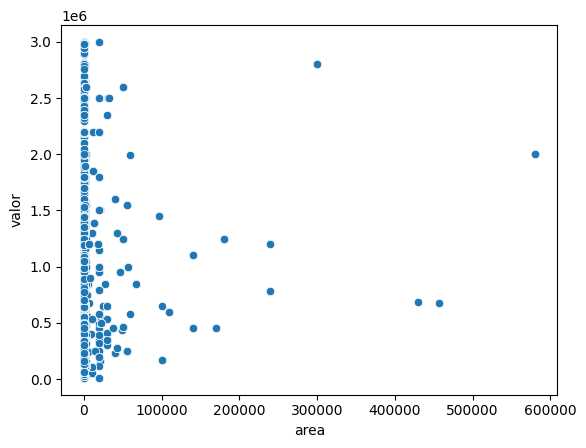

In [65]:
sns.scatterplot(x = 'area', y = 'valor', data = house_df_clean);

Ainda há valores muito alto de áreas de imóveis

<Axes: >

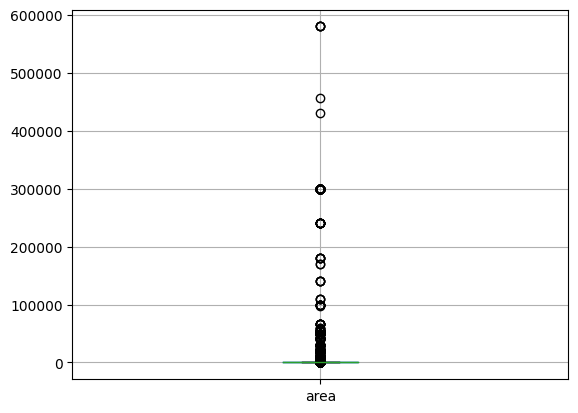

In [66]:
house_df_clean.boxplot(column='area')

In [74]:
qtd_imoveis_area_alta = len(house_df_clean[house_df_clean.area > 1_000])
qtd_imoveis_area_baixa = len(house_df_clean[house_df_clean.area < 10])
print(f"Quantidade total do dataframe é : {len(house_df_clean.area)}.")
print(f"A quantidade de imóveis com area acima de 1.000 m² é: {qtd_imoveis_area_alta}.")
print(f"A quantidade de imóveis com area abaixo de 10 m² é: {qtd_imoveis_area_baixa}.")

Quantidade total do dataframe é : 17320.
A quantidade de imóveis com area acima de 1.000 m² é: 0.
A quantidade de imóveis com area abaixo de 10 m² é: 0.


In [72]:
filtro_valor_area = (house_df_clean['area'] < 1_001)
house_df_clean = house_df_clean.loc[filtro_valor_area]
house_df_clean

,valor,quartos,garagem,banheiro,area,suite,academia,varanda,transporte,salao,planejado,latitude,longitude
0,1150000,1,0,4,450,0,0,0,0,0,0,-15.847174,-47.914693
1,1890000,5,4,5,700,0,0,0,0,0,0,-15.847174,-47.914693
2,1150000,1,0,4,450,0,0,0,0,0,0,-15.847174,-47.914693
3,1890000,5,4,5,700,0,0,0,0,0,0,-15.847174,-47.914693
4,800000,6,4,4,300,0,0,0,0,0,0,-15.847174,-47.914693
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18372,64999,2,1,1,55,0,0,0,0,0,0,-15.736666,-47.781062
18373,64999,2,1,1,55,0,0,0,0,0,0,-15.736666,-47.781062
18374,64999,2,1,1,55,0,0,0,0,0,0,-15.736666,-47.781062
18375,64999,2,1,1,55,0,0,0,0,0,0,-15.736666,-47.781062


<Axes: >

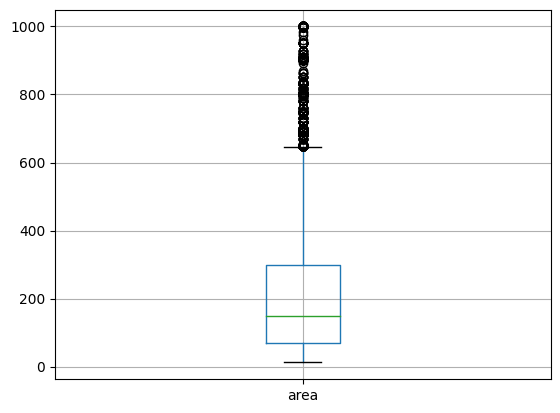

In [73]:
house_df_clean.boxplot(column='area')

Descobrindo os quartis 1 , 2 e 3 de área, média e desvio padrão

In [75]:
house_df_clean['area'].describe()

count    17320.000000
mean       213.648383
std        196.012254
min         12.000000
25%         70.000000
50%        150.000000
75%        300.000000
max       1000.000000
Name: area, dtype: float64

Calculando os limites inferiores e superiores do boxplot da area

Limite Inferior: 645.0
Limite Superior: 12


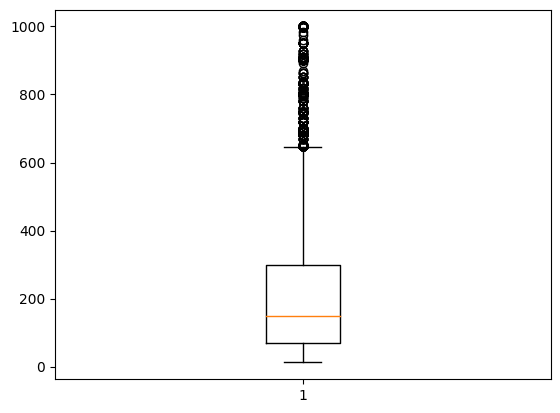

In [77]:
# Criar o boxplot
plt.boxplot(house_df_clean['area'])

# Obter os limites inferior e superior
whiskers = plt.gca().lines[2:4]
limite_inferior = whiskers[0].get_ydata()[1]
limite_superior = whiskers[1].get_ydata()[1]

# Imprimir os limites
print("Limite Inferior:", limite_inferior)
print("Limite Superior:", limite_superior)

Vamos filtrar os imóveis com áreas dentro dos limites inferiores e superiores

In [78]:
filtro_valor_area = (house_df_clean['area'] <= 645) & (house_df_clean['area'] >= 12)
house_df_clean = house_df_clean.loc[filtro_valor_area]
house_df_clean

,valor,quartos,garagem,banheiro,area,suite,academia,varanda,transporte,salao,planejado,latitude,longitude
0,1150000,1,0,4,450,0,0,0,0,0,0,-15.847174,-47.914693
2,1150000,1,0,4,450,0,0,0,0,0,0,-15.847174,-47.914693
4,800000,6,4,4,300,0,0,0,0,0,0,-15.847174,-47.914693
5,750000,4,2,4,318,0,0,0,0,0,0,-15.847174,-47.914693
6,1150000,1,0,4,450,0,0,0,0,0,0,-15.847174,-47.914693
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18372,64999,2,1,1,55,0,0,0,0,0,0,-15.736666,-47.781062
18373,64999,2,1,1,55,0,0,0,0,0,0,-15.736666,-47.781062
18374,64999,2,1,1,55,0,0,0,0,0,0,-15.736666,-47.781062
18375,64999,2,1,1,55,0,0,0,0,0,0,-15.736666,-47.781062


In [79]:
house_df_clean.describe()

,valor,quartos,garagem,banheiro,area,suite,academia,varanda,transporte,salao,planejado,latitude,longitude
count,1.634700e+04,16347.000000,16347.000000,16347.000000,16347.000000,16347.000000,16347.000000,16347.000000,16347.000000,16347.000000,16347.000000,16347.000000,16347.000000
mean,5.577041e+05,2.564568,1.892457,2.072735,179.055423,0.279623,0.015599,0.052242,0.158622,0.019392,0.049245,-15.826877,-47.981236
std,4.961051e+05,1.264645,4.985707,1.545756,137.279250,0.448828,0.123923,0.222521,0.365335,0.137902,0.216385,0.081295,0.118854
min,1.000000e+04,1.000000,0.000000,1.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-16.019399,-48.202189
25%,2.500000e+05,2.000000,0.000000,1.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-15.863892,-48.060778
50%,3.600000e+05,2.000000,1.000000,2.000000,144.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-15.826680,-48.015605
75%,6.945100e+05,3.000000,3.000000,2.000000,240.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-15.804261,-47.900049
max,3.000000e+06,20.000000,300.000000,40.000000,645.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-15.506479,-47.597110


Agora podemos ver que a distribuição está mais concentrada no intervalo de 12 a 645 m² de área

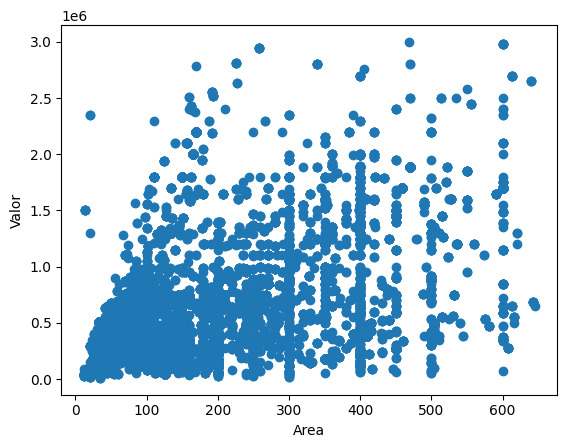

In [82]:
plt.scatter(house_df_clean['area'], house_df_clean['valor'])
plt.xlabel('Area')
plt.ylabel('Valor')
plt.show();

Vamos fazer o mesmo com os valores de imóveis

Limite Inferior: 1350000.0
Limite Superior: 10000


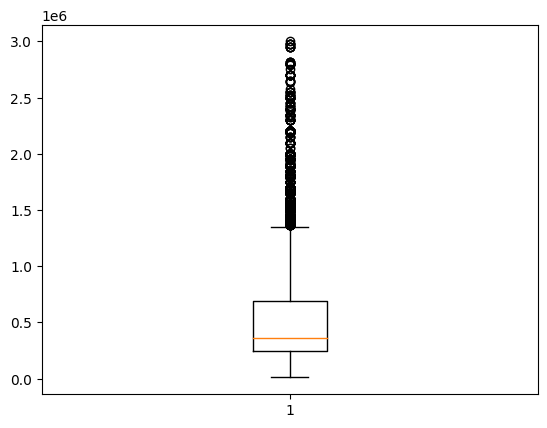

In [83]:
# Criar o boxplot
plt.boxplot(house_df_clean['valor'])

# Obter os limites inferior e superior
whiskers = plt.gca().lines[2:4]
limite_inferior = whiskers[0].get_ydata()[1]
limite_superior = whiskers[1].get_ydata()[1]

# Imprimir os limites
print("Limite Inferior:", limite_inferior)
print("Limite Superior:", limite_superior)

In [84]:
filtro_valor_valor = (house_df_clean['valor'] <= 1350000) & (house_df_clean['valor'] >= 10000)
house_df_clean = house_df_clean.loc[filtro_valor_valor]
house_df_clean

,valor,quartos,garagem,banheiro,area,suite,academia,varanda,transporte,salao,planejado,latitude,longitude
0,1150000,1,0,4,450,0,0,0,0,0,0,-15.847174,-47.914693
2,1150000,1,0,4,450,0,0,0,0,0,0,-15.847174,-47.914693
4,800000,6,4,4,300,0,0,0,0,0,0,-15.847174,-47.914693
5,750000,4,2,4,318,0,0,0,0,0,0,-15.847174,-47.914693
6,1150000,1,0,4,450,0,0,0,0,0,0,-15.847174,-47.914693
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18372,64999,2,1,1,55,0,0,0,0,0,0,-15.736666,-47.781062
18373,64999,2,1,1,55,0,0,0,0,0,0,-15.736666,-47.781062
18374,64999,2,1,1,55,0,0,0,0,0,0,-15.736666,-47.781062
18375,64999,2,1,1,55,0,0,0,0,0,0,-15.736666,-47.781062


In [85]:
house_df_clean.describe()

,valor,quartos,garagem,banheiro,area,suite,academia,varanda,transporte,salao,planejado,latitude,longitude
count,1.475500e+04,14755.000000,14755.000000,14755.000000,14755.000000,14755.00000,14755.000000,14755.00000,14755.000000,14755.000000,14755.000000,14755.000000,14755.000000
mean,4.252717e+05,2.470213,1.819180,1.833141,160.787530,0.28038,0.009827,0.05449,0.156083,0.020874,0.050966,-15.828293,-47.985124
std,2.869998e+05,1.227748,5.201834,1.297728,122.462475,0.44920,0.098647,0.22699,0.362946,0.142968,0.219935,0.083971,0.121593
min,1.000000e+04,1.000000,0.000000,1.000000,12.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,-16.019399,-48.202189
25%,2.200000e+05,2.000000,0.000000,1.000000,65.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,-15.869041,-48.071582
50%,3.300000e+05,2.000000,1.000000,1.000000,126.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,-15.828767,-48.025135
75%,5.800000e+05,3.000000,3.000000,2.000000,200.000000,1.00000,0.000000,0.00000,0.000000,0.000000,0.000000,-15.804261,-47.900049
max,1.350000e+06,20.000000,300.000000,40.000000,645.000000,1.00000,1.000000,1.00000,1.000000,1.000000,1.000000,-15.506479,-47.597110


Limite Superior: 820000.0
Limite Inferior: 10000


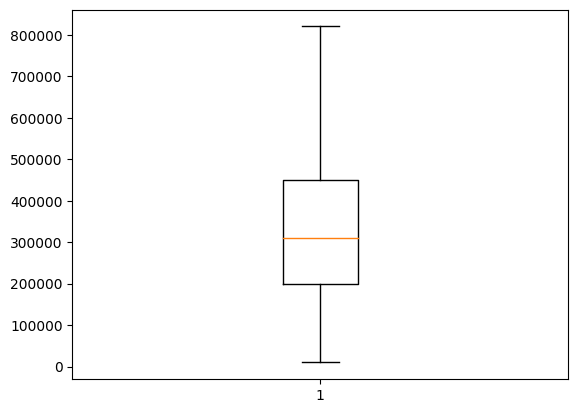

Limite Superior: 285.0
Limite Inferior: 12


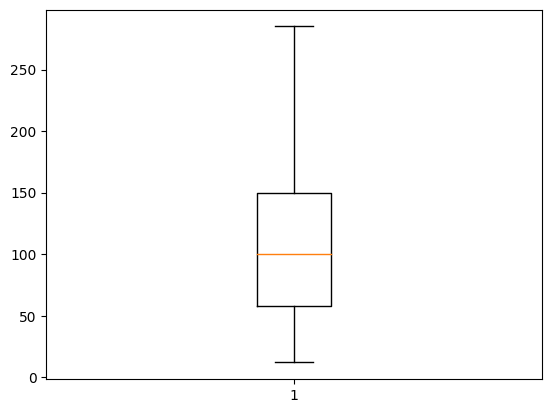

In [99]:
filtro_valor_area = (house_df_clean['area'] <= 285)
house_df_clean = house_df_clean.loc[filtro_valor_area]
house_df_clean

filtro_valor_valor = (house_df_clean['valor'] <= 820000)
house_df_clean = house_df_clean.loc[filtro_valor_valor]
house_df_clean

plt.boxplot(house_df_clean['valor'])
# Obter os limites inferior e superior
whiskers = plt.gca().lines[2:4]
limite_inferior = whiskers[0].get_ydata()[1]
limite_superior = whiskers[1].get_ydata()[1]
# Imprimir os limites
print("Limite Superior:", limite_inferior)
print("Limite Inferior:", limite_superior)
plt.show();

plt.boxplot(house_df_clean['area'])
# Obter os limites inferior e superior
whiskers = plt.gca().lines[2:4]
limite_inferior = whiskers[0].get_ydata()[1]
limite_superior = whiskers[1].get_ydata()[1]
# Imprimir os limites
print("Limite Superior:", limite_inferior)
print("Limite Inferior:", limite_superior)
plt.show();

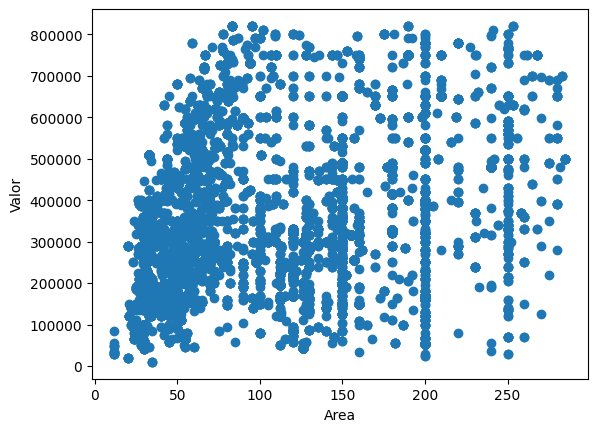

In [100]:
plt.scatter(house_df_clean['area'], house_df_clean['valor'])
plt.xlabel('Area')
plt.ylabel('Valor')
plt.show();

Fazendo a limpeza total ainda sobram 11.271 imóveis

In [101]:
house_df_clean

,valor,quartos,garagem,banheiro,area,suite,academia,varanda,transporte,salao,planejado,latitude,longitude
34,85000,1,0,1,140,0,0,0,1,0,0,-15.847174,-47.914693
35,85000,1,0,1,140,0,0,0,1,0,0,-15.847174,-47.914693
36,85000,1,0,1,140,0,0,0,1,0,0,-15.847174,-47.914693
37,85000,1,0,1,140,0,0,0,1,0,0,-15.847174,-47.914693
38,85000,1,0,1,140,0,0,0,1,0,0,-15.847174,-47.914693
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18372,64999,2,1,1,55,0,0,0,0,0,0,-15.736666,-47.781062
18373,64999,2,1,1,55,0,0,0,0,0,0,-15.736666,-47.781062
18374,64999,2,1,1,55,0,0,0,0,0,0,-15.736666,-47.781062
18375,64999,2,1,1,55,0,0,0,0,0,0,-15.736666,-47.781062


In [102]:
house_df_clean.describe()

,valor,quartos,garagem,banheiro,area,suite,academia,varanda,transporte,salao,planejado,latitude,longitude
count,11271.000000,11271.000000,11271.000000,11271.000000,11271.000000,11271.000000,11271.000000,11271.000000,11271.000000,11271.000000,11271.000000,11271.000000,11271.000000
mean,337157.691864,2.379647,1.689557,1.601100,108.722296,0.284447,0.012687,0.052258,0.158460,0.026262,0.051371,-15.828962,-47.985116
std,178484.606862,1.039439,5.815949,0.817214,60.906681,0.451171,0.111927,0.222557,0.365188,0.159921,0.220763,0.085457,0.125049
min,10000.000000,1.000000,0.000000,1.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-16.019399,-48.202189
25%,200000.000000,2.000000,0.000000,1.000000,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-15.871185,-48.075634
50%,310000.000000,2.000000,1.000000,1.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-15.828767,-48.017476
75%,450000.000000,3.000000,2.000000,2.000000,150.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-15.803258,-47.900049
max,820000.000000,15.000000,300.000000,7.000000,285.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-15.506479,-47.597110


Gráficos de frequência

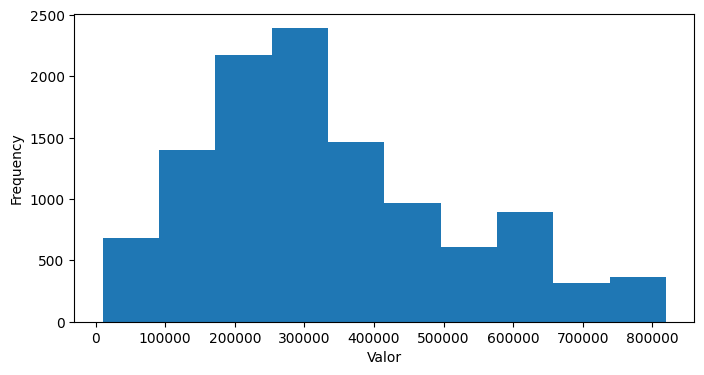

In [108]:
house_df_clean.valor.plot.hist(figsize=(8, 4))
plt.xlabel('Valor')
plt.show();

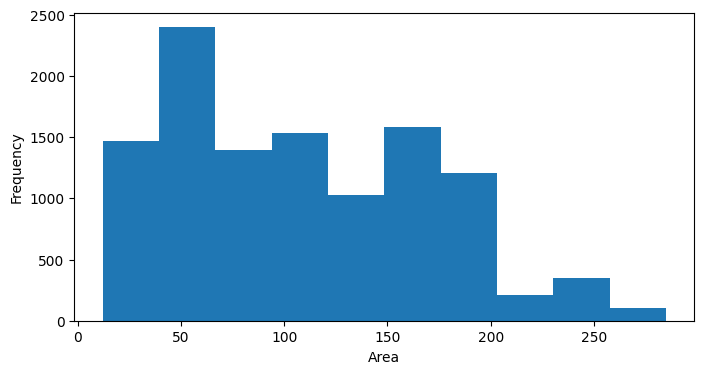

In [109]:
house_df_clean.area.plot.hist(figsize=(8, 4))
plt.xlabel('Area')
plt.show();

Plotando coordenadas geográficas
Podemos, inicialmente, plotar o gráfico scatter para termos uma ideia da distribuição geográfica dos imóveis. Para isso utilizaremos a função DataFrame.plot.scatter(). Os parâmetros x e y recebem o nome da coluna contendo os dados para cada um dos respectivos eixos. Definiremos, também, o tamanho da figura para as dimensões 10 x 8 através do parâmetro figsize=(10, 0). Para manter idêntica a escala dos eixos, acrescentamos o comando plt.axis('equal').

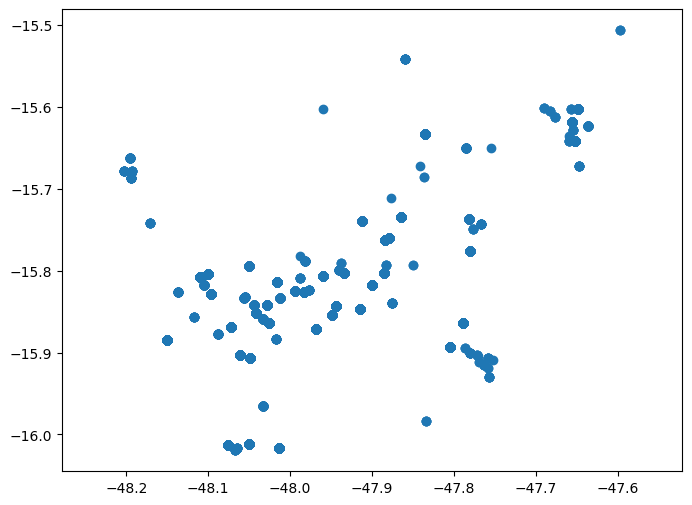

In [112]:
# Atenção para a ordenação dos itens do plt
plt.figure(figsize = (8,6))
plt.axis('equal')
plt.scatter(x = house_df_clean.longitude, y = house_df_clean.latitude)
plt.show();

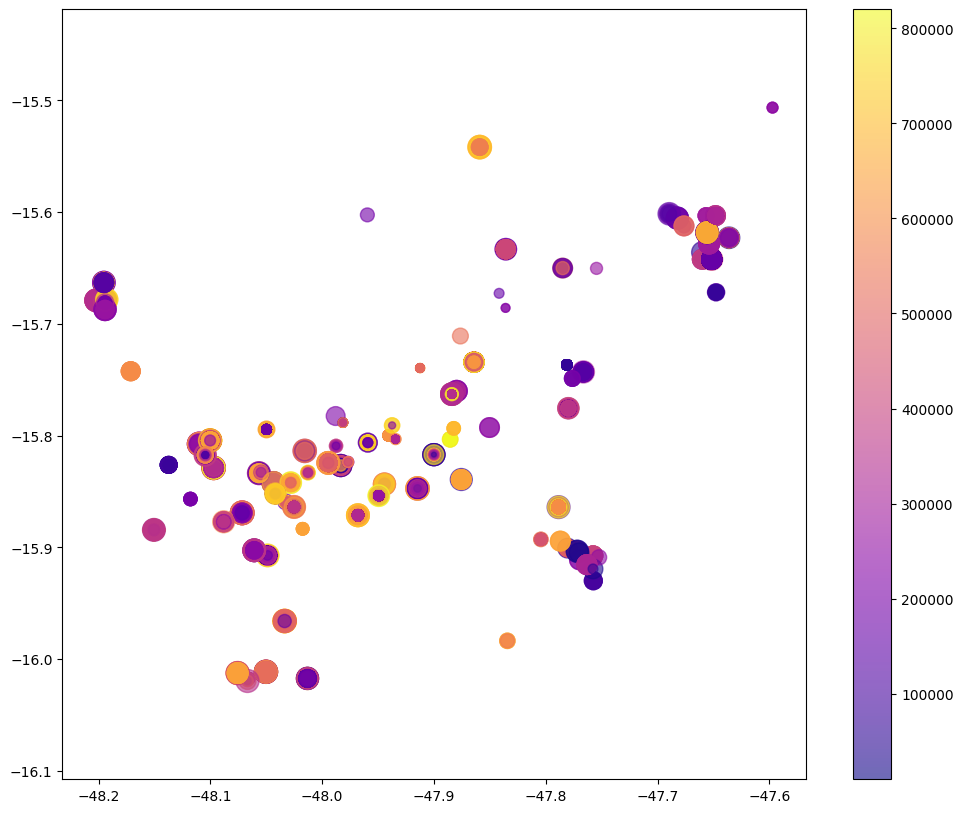

In [114]:
# Atenção para a ordenação dos itens do plt
plt.figure(figsize = (12,10))
plt.axis('equal')
plt.scatter(x = house_df_clean.longitude, y = house_df_clean.latitude,
            c = house_df_clean.valor,
            cmap = 'plasma',
            s = house_df_clean.area, # diminuimos o tamanho da size para ver melhor onde estão
                                           # os pontos maiores e os menores
            alpha = 0.6)
plt.colorbar();

<ipython-input-124-053594eb9073>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(house_df_clean.valor);


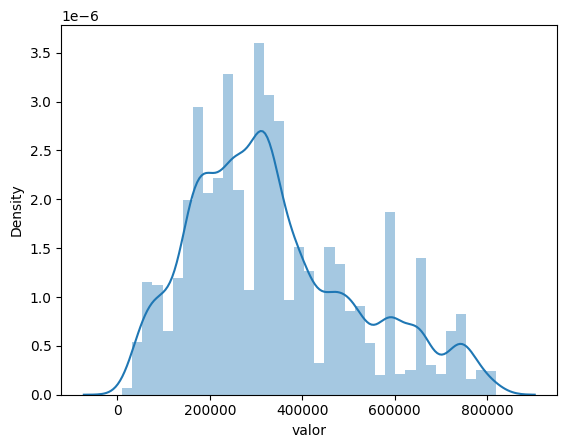

<ipython-input-124-053594eb9073>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(house_df_clean.area);


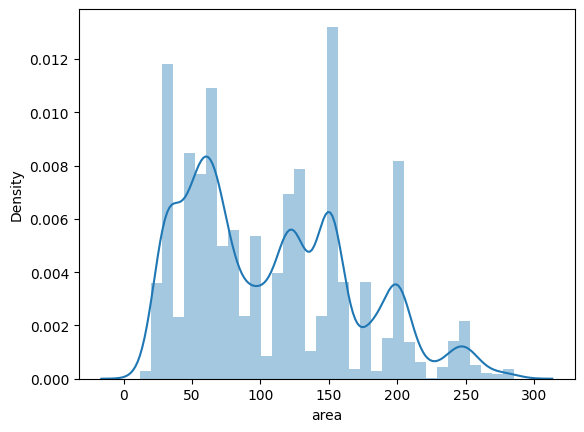

In [124]:
sns.distplot(house_df_clean.valor);
plt.show();
sns.distplot(house_df_clean.area);
plt.show();

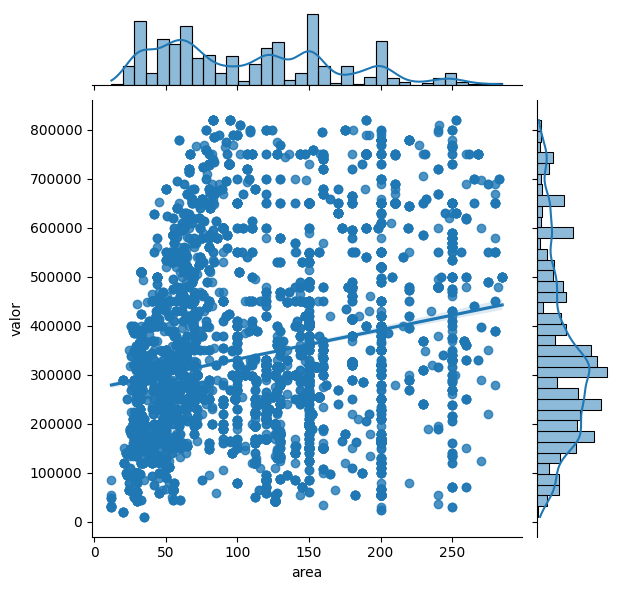

In [125]:
sns.jointplot(x='area', y='valor', kind='reg', data=house_df_clean);

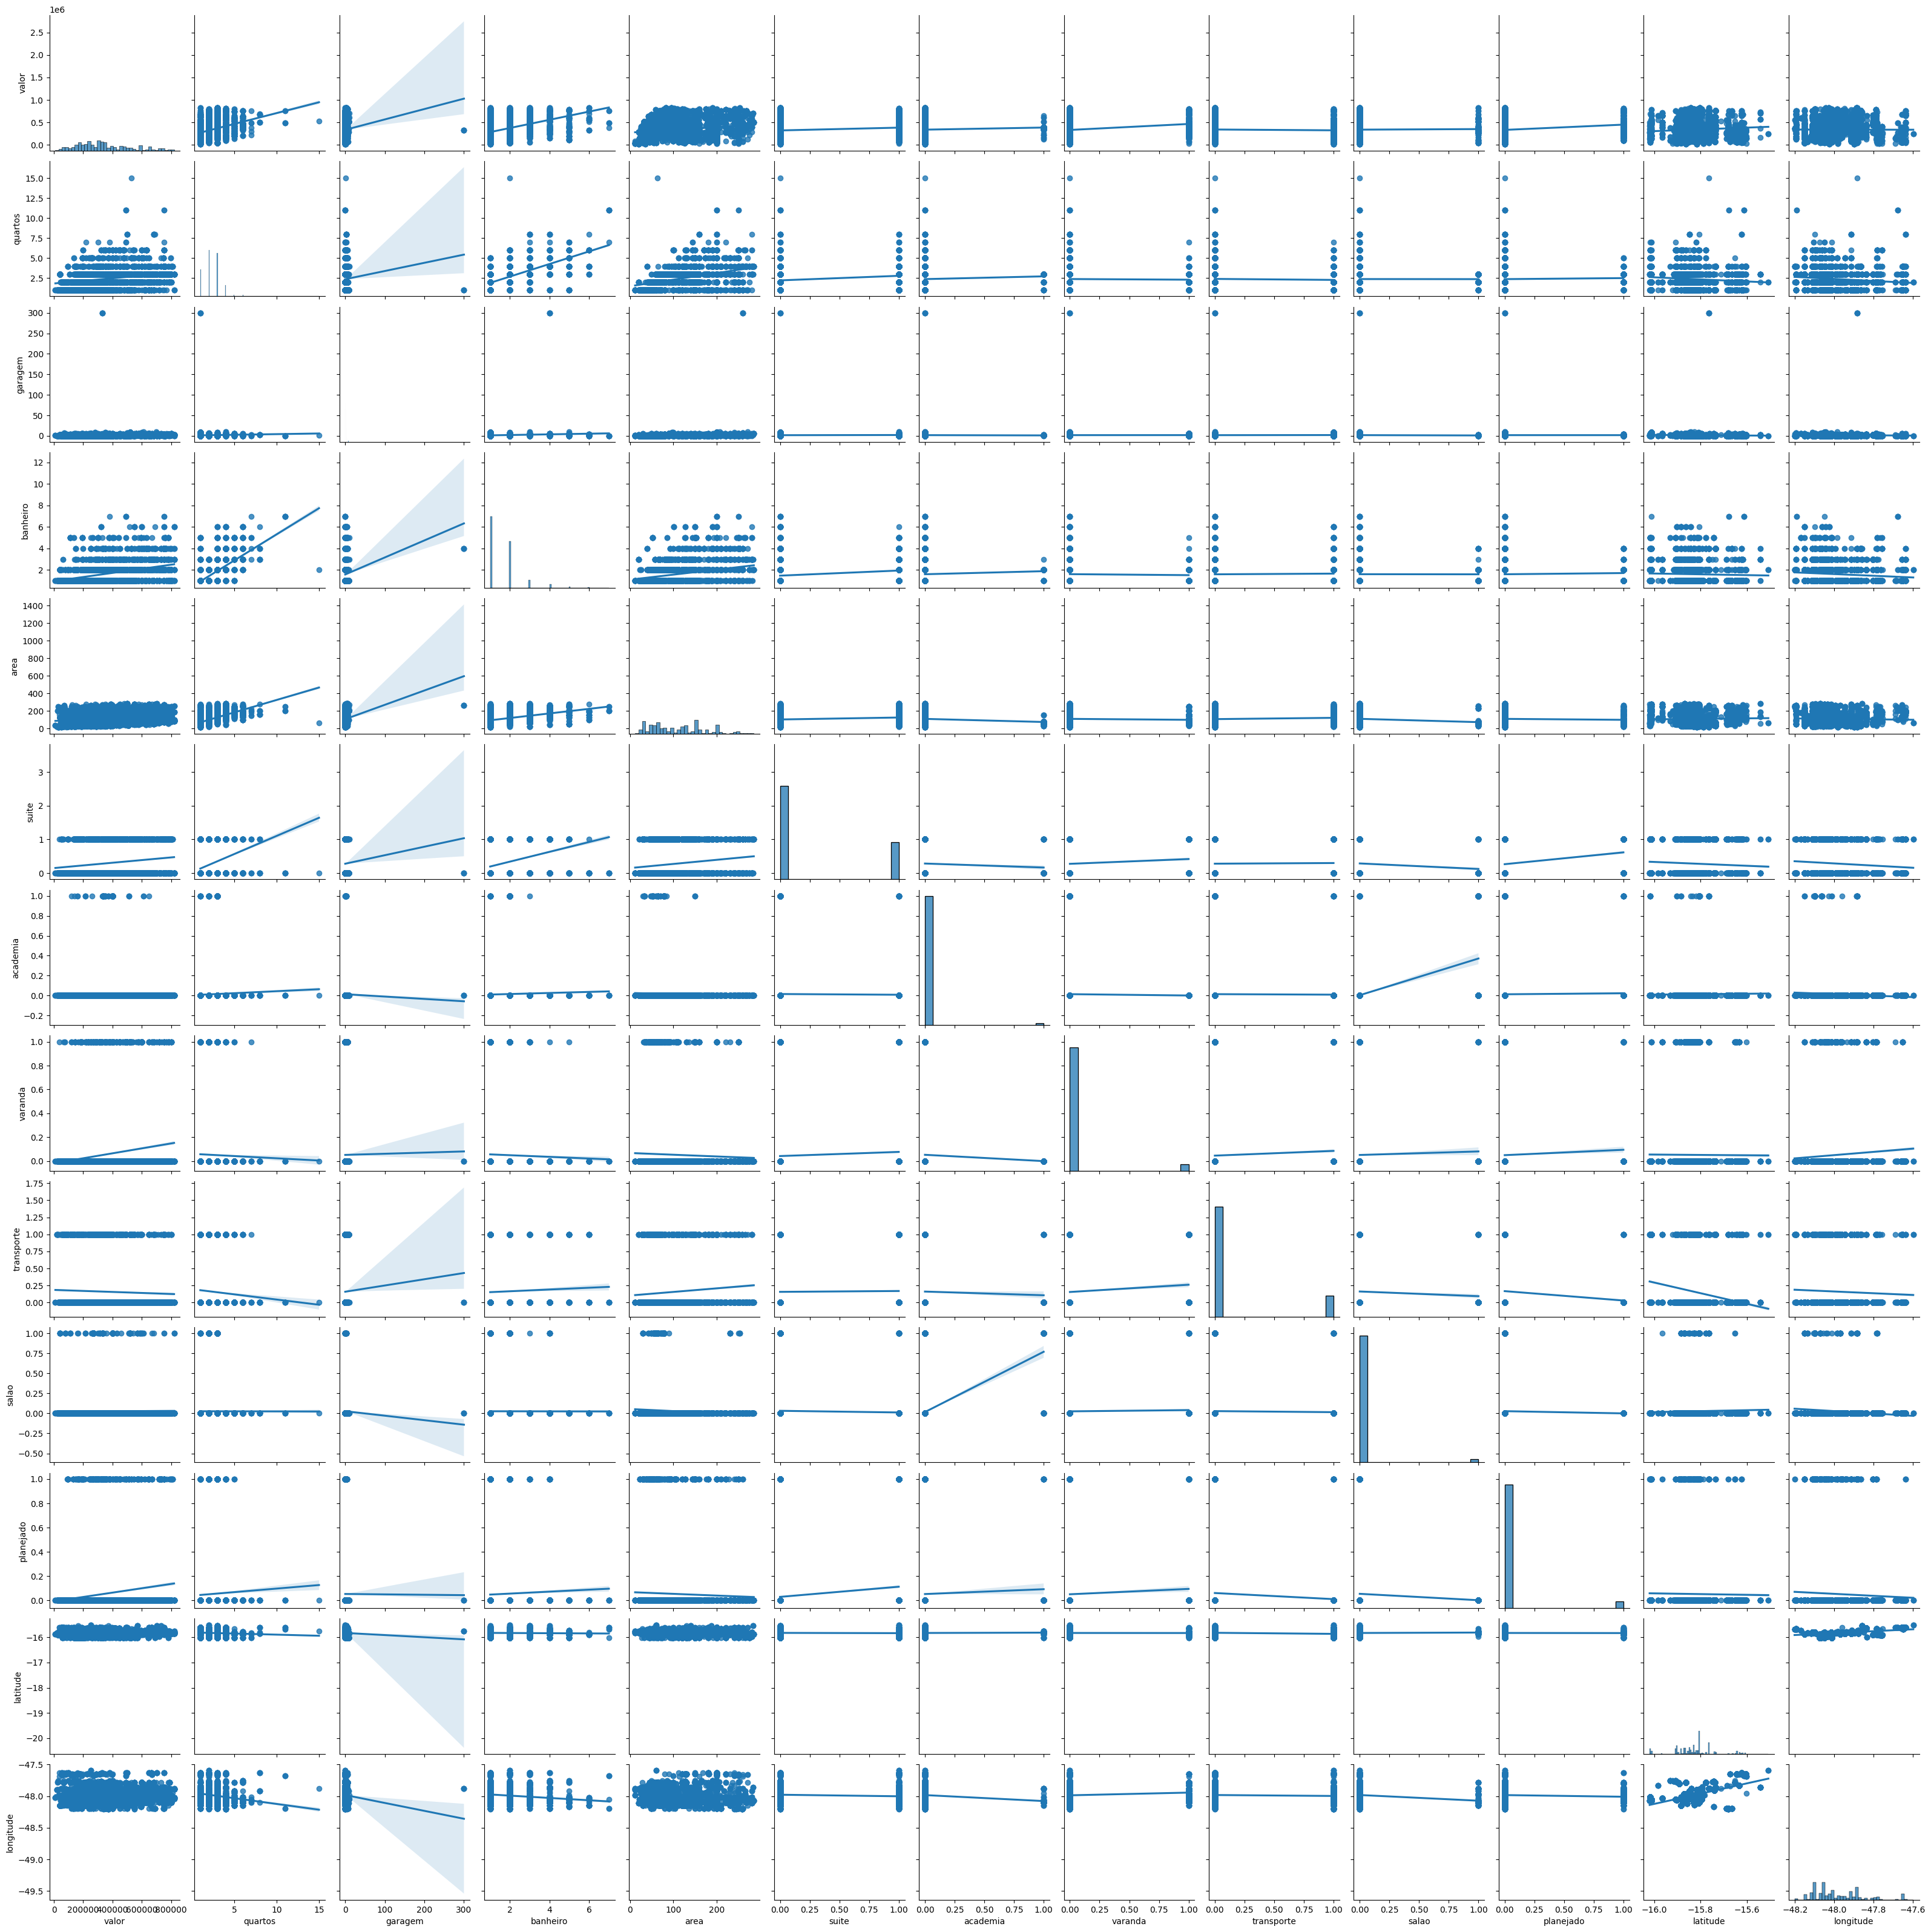

In [126]:
sns.pairplot(kind='reg', data=house_df_clean);